# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

**Содержание**<a id='toc0_'></a>    
- [Исследование объявлений о продаже квартир                  ](#toc1_)    
    - [Часть 1. Изучение общей информации                     ](#toc1_1_1_)    
      - [Импорт необходимых библиотек                    ](#toc1_1_1_1_)    
      - [Содержание данных              ](#toc1_1_1_2_)    
      - [Описание данных             ](#toc1_1_1_3_)    
      - [Графики распределений данных и их описание             ](#toc1_1_1_4_)    
    - [Часть 2. Переработка данных         ](#toc1_1_2_)    
      - [Дата публикации       ](#toc1_1_2_1_)    
      - [Процент пропусков в каждой колонке       ](#toc1_1_2_2_)    
      - [Статус апартаментов       ](#toc1_1_2_3_)    
      - [Цена объектов недвижимости       ](#toc1_1_2_4_)    
      - [Высота потолков       ](#toc1_1_2_5_)    
      - [Название населённого пункта       ](#toc1_1_2_6_)    
      - [Балконы       ](#toc1_1_2_7_)    
      - [Сколько времени просуществовало объявление       ](#toc1_1_2_8_)    
      - [Этажы       ](#toc1_1_2_9_)    
      - [Комнаты       ](#toc1_1_2_10_)    
      - [Автоматические данные: парки, пруды и аэропорт       ](#toc1_1_2_11_)    
      - [Итог переработки данных       ](#toc1_1_2_12_)    
    - [Часть 3. Добавление новых столбцов в таблицу      ](#toc1_1_3_)    
    - [Часть 4. Исследовательский анализ данных     ](#toc1_1_4_)    
      - [Вывод     ](#toc1_1_4_1_)    
    - [Как быстро продавались квартиры?     ](#toc1_1_5_)    
      - [Вывод     ](#toc1_1_5_1_)    
    - [Какие факторы влияют на общую (полную) стомость объекта?     ](#toc1_1_6_)    
        - [Вывод  ](#toc1_1_6_1_1_)    
    - [Средняя цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений:     ](#toc1_1_7_)    
      - [Вывод  ](#toc1_1_7_1_)    
    - [Средняя цена километра от центра в городе "Санкт-Петербруг"     ](#toc1_1_8_)    
      - [Вывод  ](#toc1_1_8_1_)    
    - [Итоги исследования  ](#toc1_1_9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>Часть 1. Изучение общей информации                      [](#toc0_)

#### <a id='toc1_1_1_1_'></a>Импорт необходимых библиотек                     [](#toc0_)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:20,.3f}'.format

#### <a id='toc1_1_1_2_'></a>Содержание данных               [](#toc0_)

In [3]:
try:
    data = pd.read_csv('/Volumes/GoogleDrive/My Drive/YP/real_estate_data.csv',sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t')

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.000",108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,False,False,25.000,NaN,Санкт-Петербург,"18,863.000","16,028.000",1.000,482.000,2.000,755.000,NaN
1,7,"3,350,000.000",40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,False,False,11.000,2.000,посёлок Шушары,"12,817.000","18,603.000",0.000,NaN,0.000,NaN,81.000
2,10,"5,196,000.000",56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,False,False,8.300,0.000,Санкт-Петербург,"21,741.000","13,933.000",1.000,90.000,2.000,574.000,558.000
3,0,"64,900,000.000",159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,False,False,NaN,0.000,Санкт-Петербург,"28,098.000","6,800.000",2.000,84.000,3.000,234.000,424.000
4,2,"10,000,000.000",100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,False,False,41.000,NaN,Санкт-Петербург,"31,856.000","8,098.000",2.000,112.000,1.000,48.000,121.000
5,10,"2,890,000.000",30.400,2018-09-10T00:00:00,1,NaN,12.000,14.400,5,NaN,False,False,9.100,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000
6,6,"3,700,000.000",37.300,2017-11-02T00:00:00,1,NaN,26.000,10.600,6,NaN,False,False,14.400,1.000,посёлок Парголово,"52,996.000","19,143.000",0.000,NaN,0.000,NaN,155.000
7,5,"7,915,000.000",71.600,2019-04-18T00:00:00,2,NaN,24.000,NaN,22,NaN,False,False,18.900,2.000,Санкт-Петербург,"23,982.000","11,634.000",0.000,NaN,0.000,NaN,NaN
8,20,"2,900,000.000",33.160,2018-05-23T00:00:00,1,NaN,27.000,15.430,26,NaN,False,False,8.810,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000
9,18,"5,400,000.000",61.000,2017-02-26T00:00:00,3,2.500,9.000,43.600,7,NaN,False,False,6.500,2.000,Санкт-Петербург,"50,898.000","15,008.000",0.000,NaN,0.000,NaN,289.000


Описание данных:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `balcony` — число балконов;
* `ceiling_height` — высота потолков (м);
* `cityCenters_nearest` — расстояние до центра города (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* `first_day_exposition` — дата публикации;
* `floor` — этаж;
* `foors_total` — всего этажей в доме;
* `is_apartment` — апартаменты (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `last_price` — цена на момент снятия с публикации;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `locality_name` — название населённого пункта;
* `open_plan` — свободная планировка (булев тип);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма (м);
* `rooms` — число комнат;
* `studio` — квартира-студия (булев тип);
* `total_area` — общая площадь квартиры в квадратных метрах (м²);
* `total_images` — число фотографий квартиры в объявлении.

#### <a id='toc1_1_1_3_'></a>Описание данных              [](#toc0_)

In [5]:
data.info()
shape_dirty = data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### <a id='toc1_1_1_4_'></a>Графики распределений данных и их описание              [](#toc0_)

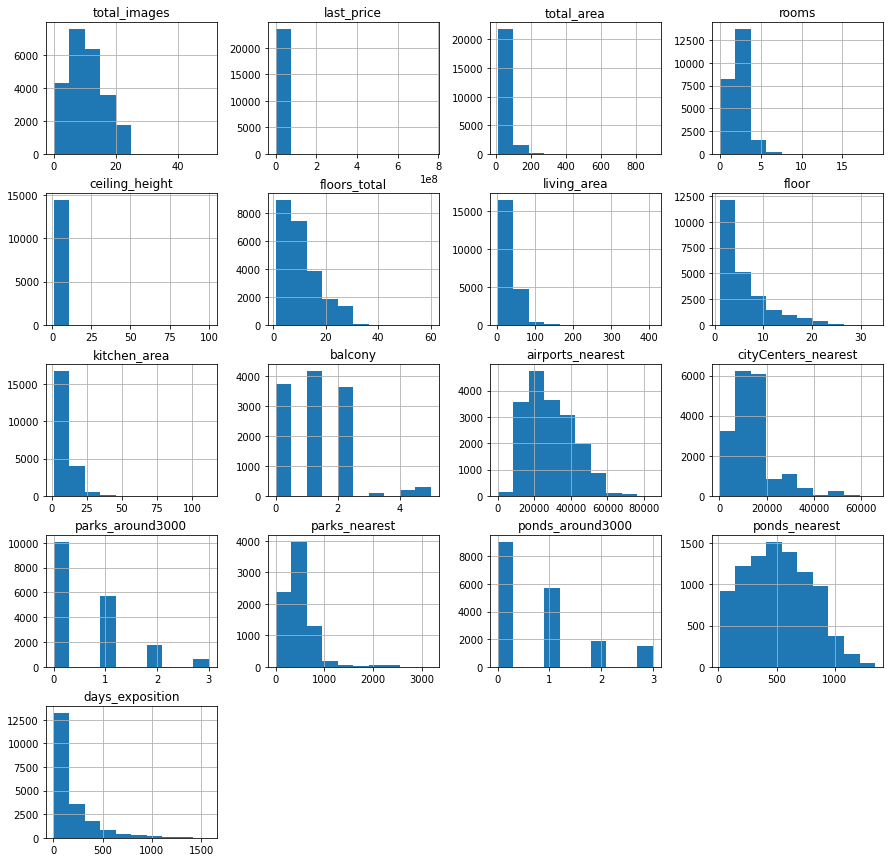

In [6]:
data_hist_dirty = data.hist(figsize=(15,15))

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.000","23,699.000","23,699.000","23,699.000","14,504.000","23,613.000","21,796.000","23,699.000","21,421.000","12,180.000","18,157.000","18,180.000","18,181.000","8,079.000","18,181.000","9,110.000","20,518.000"
mean,9.858,"6,541,548.772",60.349,2.071,2.771,10.674,34.458,5.892,10.570,1.150,"28,793.672","14,191.278",0.611,490.805,0.770,517.981,180.889
std,5.683,"10,887,013.268",35.654,1.078,1.261,6.597,22.030,4.885,5.905,1.071,"12,630.881","8,608.386",0.802,342.318,0.938,277.721,219.728
min,0.000,"12,190.000",12.000,0.000,1.000,1.000,2.000,1.000,1.300,0.000,0.000,181.000,0.000,1.000,0.000,13.000,1.000
25%,6.000,"3,400,000.000",40.000,1.000,2.520,5.000,18.600,2.000,7.000,0.000,"18,585.000","9,238.000",0.000,288.000,0.000,294.000,45.000
50%,9.000,"4,650,000.000",52.000,2.000,2.650,9.000,30.000,4.000,9.100,1.000,"26,726.000","13,098.500",0.000,455.000,1.000,502.000,95.000
75%,14.000,"6,800,000.000",69.900,3.000,2.800,16.000,42.300,8.000,12.000,2.000,"37,273.000","16,293.000",1.000,612.000,1.000,729.000,232.000
max,50.000,"763,000,000.000",900.000,19.000,100.000,60.000,409.700,33.000,112.000,5.000,"84,869.000","65,968.000",3.000,"3,190.000",3.000,"1,344.000","1,580.000"


*Первые выводы*:

* Данные содержат 22 колонки и 23699 строки;
* Из таблицы `data.info()` можно увидеть, что в данных есть пропуски. При этом не все типы данных указаны корректно:
  - *Обязательные* к изменению: колонка `first_day_exposition` - стоит поменять на тип данных `datetime`;
  - *Желательные* к изменению: колонки `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` на `int`, `is_apartment` на `bool`.
  - Пропуски присутсвую во всех автоматически собранных данных, а так же в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `balcony`, `kitchen_area`, `floors_total` и `locality_name`, которые заполняли пользователи. 
* Графики `гистограмм` и `data.describe()` показывают, что в данных есть аномальные значения. Так, можно наблюдать:
  - Огромный разброс по цене недвижимости. При этом большинство вариантов это объекты до 10 миллионов рублей;
  - Тоже самое с общей площадью и количеством комнат;
  - Аномалии присувтсвуют и в высоте потолков. В данных есть объекты, с высотой потолков больше 10 метров;
  
Переработаем каждую колонку с данными на предмет аномалий и пропусков.


### <a id='toc1_1_2_'></a>Часть 2. Переработка данных          [](#toc0_)

#### <a id='toc1_1_2_1_'></a>Дата публикации        [](#toc0_)

Изменим тип данных в колонке `first_day_exposition`, для работы с датой и временем. Добавим отдельные колонки с днём недели, месяцем и годом выставления объявления

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['weekday_first_exposition'] = data['first_day_exposition'].dt.weekday
data['month_of_first_exposition'] = data['first_day_exposition'].dt.month
data['year_first_exposition'] = data['first_day_exposition'].dt.year

Переименуем столбец `cityCenters_nearest` в `city_centers_nearest`.

In [9]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

#### <a id='toc1_1_2_2_'></a>Процент пропусков в каждой колонке        [](#toc0_)

In [10]:
spaced_data = (
            (data.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending=True)
)
spaced_data.sort_values(by='space', ascending=False).style.format("{:,.2f}%")

,space
is_apartment,88.29%
parks_nearest,65.91%
ponds_nearest,61.56%
balcony,48.61%
ceiling_height,38.80%
airports_nearest,23.38%
city_centers_nearest,23.29%
parks_around3000,23.28%
ponds_around3000,23.28%
days_exposition,13.42%


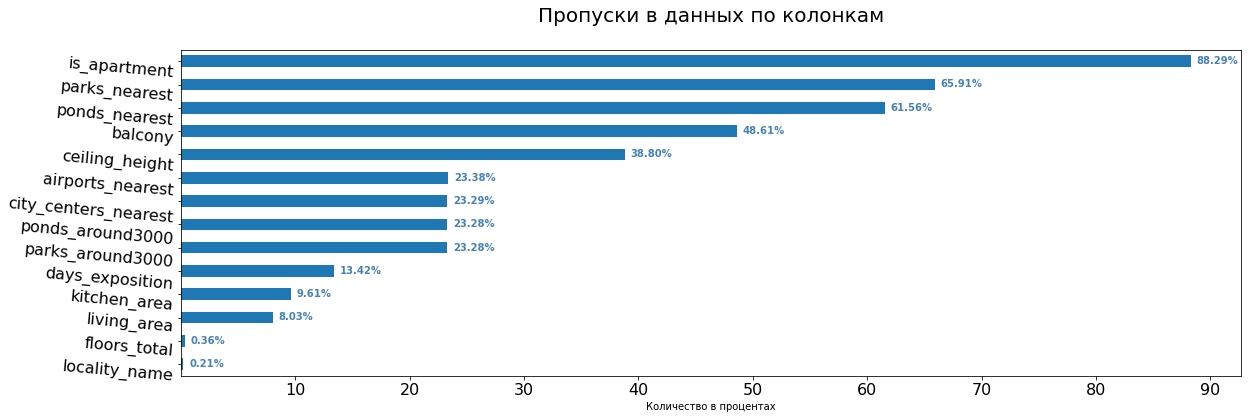

In [13]:
ax = spaced_data.plot.barh(y='space', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
ax.xaxis.set_ticks([10,20,30,40,50,60,70,80,90])
ax.set_title('Пропуски в данных по колонкам' + '\n', fontsize = 20)
ax.set_xlabel('Количество в процентах')
for i, v in enumerate(spaced_data.space):
    ax.text(v + 0.5, i - .1, '{:,.2f}%'.format((v)), color='SteelBlue', fontweight='bold')

Самое большое количество пропусков у `is_apartment` - `88.29%`. Проверим гипотезу: "Пользователь в ручную заполняет значения `True` или `False`, при этом значение `False` не заполняется автоматически". Если гипотеза верна, мы должны увидеть преобладание `True` над `False`. 

In [14]:
display(data.pivot_table(index='year_first_exposition', 
                         values='is_apartment', 
                         aggfunc=['count','sum']).droplevel(1,axis=1))
print("Среднее процент отношения в заполненных данных  апартаментов к не апартаментам составляет:   {:,.2f}%".format(data['is_apartment'].mean()))

,count,sum
year_first_exposition,,
2014,28,2
2015,327,3
2016,878,4
2017,840,4
2018,461,29
2019,241,8


Среднее процент отношения в заполненных данных  апартаментов к не апартаментам составляет:   0.02%


Предположение оказалось неверным. На протяжении всех годов количество объявлений, не являющихся апартаментами, было сильно больше, чем объявлений с апартаментами. В среднем лишь 3 объекта из 100 были отмечены как апартаменты. Таким образом, заполнять все пропуски в `is_apartment` значением `False` будет некорректно. При этом, с таким количеством пропусков колонка не несёт никакой информации, поэтому её можно удалить.

In [16]:
data.drop(columns=['is_apartment'], inplace=True)

#### <a id='toc1_1_2_4_'></a>Цена объектов недвижимости        [](#toc0_)

Далее детально рассмотрим данные - `last_price`.

In [17]:
data['last_price'].describe()

count             23,699.000
mean           6,541,548.772
std           10,887,013.268
min               12,190.000
25%            3,400,000.000
50%            4,650,000.000
75%            6,800,000.000
max          763,000,000.000
Name: last_price, dtype: float64

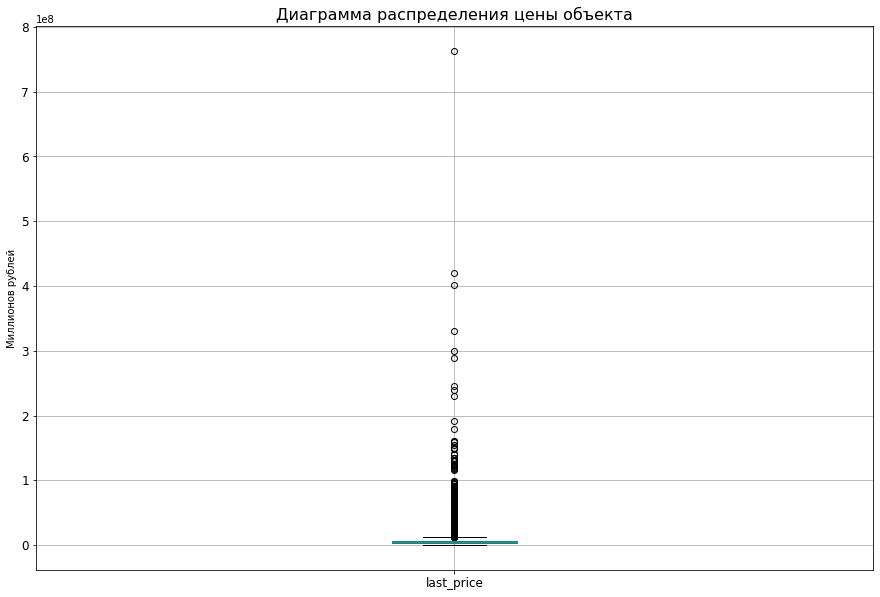

In [18]:
fig = plt.figure()
data.boxplot(column='last_price', grid=True, fontsize=12)
plt.title('Диаграмма распределения цены объекта', fontsize=16)
fig.set_figwidth(15) 
fig.set_figheight(10) 
plt.ylabel('Миллионов рублей')
plt.show() 

На графике распределения цен можно видеть огромный хвост. При этом абсолютное большинство объектов недвижимости стоит до 10 миллионов.

Минимальное значение `last_price` - `12 тысяч ₽`. Неправдоподобно мало, посмотрим все объекты стоимостью ниже `500 тысяч ₽`.

In [19]:
data.query('last_price < 500000').sort_values(by='last_price').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_first_exposition,month_of_first_exposition,year_first_exposition
8793,7,"12,190.000",109.000,2019-03-20,2,2.750,25.000,32.000,25,False,False,40.500,NaN,Санкт-Петербург,"36,421.000","9,176.000",1.000,805.000,0.000,NaN,8.000,2,3,2019
14911,5,"430,000.000",54.000,2018-06-26,2,NaN,3.000,NaN,3,False,False,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.000,1,6,2018
17456,7,"430,000.000",30.400,2019-04-22,1,NaN,2.000,16.000,1,False,False,6.000,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,2019
16274,18,"440,000.000",40.000,2018-07-10,1,NaN,5.000,NaN,1,False,False,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.000,1,7,2018
5698,7,"450,000.000",42.000,2017-07-31,2,NaN,1.000,23.000,1,False,False,5.800,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.000,0,7,2017


Есть всего один объект, который стоит меньше `400000 ₽`. При этом, опираясь на другие данные, можно сделать вывод, что цена записана с ошибкой. Не зная всех условий, менять цену на "справедливую" будет неправильным решением, в связи с чем удаляем строку. Проверим так же максимальное значение:

In [20]:
amount = data.query('last_price > last_price.quantile(.987)')['total_images'].count()
price =  data.last_price.quantile(.987)
print('98.7% всех объектов соответсвуют цене до {:,.0f}.'.format(price))
print('Количество объектов, дороже чем {:,.0f} миллиона рублей, составляет: {}' \
      .format(price,amount))

98.7% всех объектов соответсвуют цене до 30,899,926.
Количество объектов, дороже чем 30,899,926 миллиона рублей, составляет: 309


Text(0.5, 0, 'милл.')

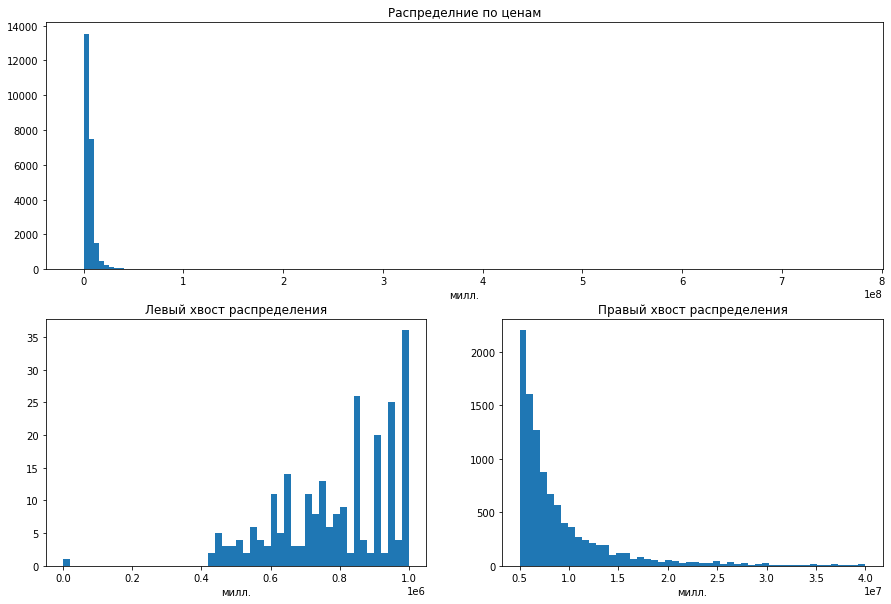

In [21]:
fig = plt.figure()

fig.set_figwidth(15) 
fig.set_figheight(10) 



ax_1 = fig.add_subplot(2, 1, 1)
ax_2 = fig.add_subplot(2, 2, 3)
ax_3 = fig.add_subplot(2, 2, 4)


ax_1.hist(x=data.last_price,bins = 150)
ax_2.hist(x=data.last_price,bins = 50,range=(0,0.1e7))
ax_3.hist(x=data.last_price,bins = 50,range=(0.5e7,4e7))

ax_1.set(title='Распределние по ценам')
ax_2.set(title='Левый хвост распределения')
ax_3.set(title='Правый хвост распределения')

ax_1.set_xlabel('милл.')
ax_2.set_xlabel('милл.')
ax_3.set_xlabel('милл.')

Количество объектов дороже 30 миллионов в маштаках датасета мало. Избавляемся от найденных аномалий:

In [22]:
data = data.query('last_price < last_price.quantile(.987) & last_price > 400000')

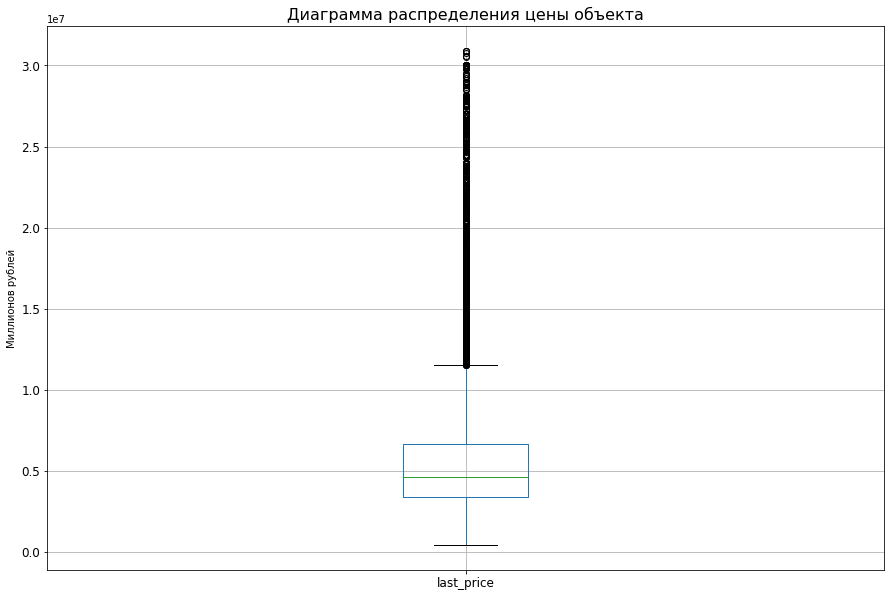

In [23]:
fig = plt.figure()
data.boxplot(column='last_price', figsize=(10,5), grid=True, fontsize=12)
fig.set_figwidth(15) 
fig.set_figheight(10) 
plt.title('Диаграмма распределения цены объекта',fontsize=16)
plt.ylabel('Миллионов рублей')
plt.show() 

#### <a id='toc1_1_2_6_'></a>Название населённого пункта        [](#toc0_)

Следующий шаг - анализ `locality_name`. Цель - избавиться от пропусков, неявных дубликатов. Напишем функцию, которая будет возвращать словарь повторяющихся значений. 

In [24]:
data = data.loc[data['locality_name'].isna() == False]

In [25]:
def name_check(unique_name_of_location):
  dict_same_name = {}
  for value in unique_name_of_location:
    count = 0
    lst_2 = []
    for value_2 in unique_name_of_location:
      if value.split()[-1] in value_2:
        count += 1
        lst_2.append(value_2)
        if (count > 1) & (value.split()[-1] != 'Бор') & (value.split()[-1] != 'Старая') & (value.split()[-1] != 'Горка'):
          dict_same_name[value] = lst_2
  return dict_same_name
name_check(data['locality_name'].unique())

{'городской посёлок Янино-1': ['городской посёлок Янино-1',
  'городской поселок Янино-1'],
 'посёлок Мурино': ['посёлок Мурино', 'поселок Мурино', 'Мурино'],
 'деревня Кудрово': ['деревня Кудрово', 'Кудрово'],
 'Коммунар': ['Коммунар', 'поселок Коммунары'],
 'поселок Мурино': ['посёлок Мурино', 'поселок Мурино', 'Мурино'],
 'деревня Фёдоровское': ['деревня Фёдоровское',
  'городской посёлок Фёдоровское'],
 'посёлок городского типа Лебяжье': ['посёлок городского типа Лебяжье',
  'поселок городского типа Лебяжье'],
 'поселок городского типа Кузьмоловский': ['поселок городского типа Кузьмоловский',
  'посёлок городского типа Кузьмоловский'],
 'садовое товарищество Новая Ропша': ['садовое товарищество Новая Ропша',
  'посёлок Ропша'],
 'Кингисепп': ['Кингисепп', 'поселок Кингисеппский'],
 'посёлок Аннино': ['посёлок Аннино', 'поселок Аннино'],
 'посёлок Новый Свет': ['посёлок Новый Свет',
  'поселок Новый Свет',
  'Светогорск'],
 'Мурино': ['посёлок Мурино', 'поселок Мурино', 'Мурино'],
 

В глаза сразу бросаются следующие дубликаты:
- `поселок` - `посёлок`;
- `посёлок городского типа` - `городской посёлок`;
- `посёлок при железнодорожной станции` : `посёлок станции`

Изменим их, а также поменяем `село`,`деревню`,`коттеджный посёлок` на `посёлок`

In [26]:
dict_to_change = {'поселок' : 'посёлок', 'посёлок городского типа' : 'городской посёлок', 'посёлок при железнодорожной станции' : 'посёлок станции',
                  'садовое товарищество' : 'посёлок', 'деревня' : 'посёлок', 'село' : 'посёлок', 'коттеджный посёлок' :'посёлок'}
for key in dict_to_change:
    data['locality_name'].replace(key, dict_to_change[key], regex=True, inplace=True)

In [27]:
name_check(data['locality_name'].unique())

{'посёлок Мурино': ['посёлок Мурино', 'Мурино'],
 'посёлок Кудрово': ['посёлок Кудрово', 'Кудрово'],
 'Коммунар': ['Коммунар', 'посёлок Коммунары'],
 'посёлок Фёдоровское': ['посёлок Фёдоровское',
  'городской посёлок Фёдоровское'],
 'посёлок Новая Ропша': ['посёлок Новая Ропша', 'посёлок Ропша'],
 'Кингисепп': ['Кингисепп', 'посёлок Кингисеппский'],
 'посёлок Новый Свет': ['посёлок Новый Свет', 'Светогорск'],
 'Мурино': ['посёлок Мурино', 'Мурино'],
 'Никольское': ['Никольское', 'посёлок Никольское'],
 'Кудрово': ['посёлок Кудрово', 'Кудрово'],
 'посёлок Романовка': ['посёлок Романовка', 'посёлок Малая Романовка'],
 'Луга': ['Луга', 'посёлок Усть-Луга'],
 'посёлок Павлово': ['посёлок Павлово', 'городской посёлок Павлово'],
 'городской посёлок Большая Ижора': ['городской посёлок Большая Ижора',
  'посёлок Усть-Ижора'],
 'городской посёлок Павлово': ['посёлок Павлово', 'городской посёлок Павлово'],
 'городской посёлок Рахья': ['городской посёлок Рахья', 'посёлок Рахья'],
 'посёлок Больш

При этом, наверняка осталось какое-то количество неявных дубликатов. Однако для более корректного анализа стоит воспользоваться гео данными, что выходит за рамки данного исследования.

In [28]:
data.locality_name.nunique()

315

In [29]:
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'посёлок Кудрово', 'Коммунар', 'Колпино',
       'городской посёлок Красный Бор', 'Гатчина', 'посёлок Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'посёлок Новое Девяткино',
       'посёлок Металлострой', 'городской посёлок Лебяжье',
       'городской посёлок Сиверский', 'посёлок Молодцово',
       'городской посёлок Кузьмоловский', 'посёлок Новая Ропша',
       'Павловск', 'посёлок Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'посёлок Куттузи',
       'посёлок Аннино', 'городской посёлок Ефимовский',
       'посёлок Плодовое', 'посёлок Заклинье', 'посёлок Торковичи',
       'посёлок Первомайское', 'Красное Село', 'посёлок Понтонный',
       'Сясьстрой', 'посёлок Старая', 'посёлок Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'посёлок Путилово', 'Ивангород',
    

#### <a id='toc1_1_2_5_'></a>Высота потолков        [](#toc0_)

Следующие данные для анализа - `ceiling_height`. Построим график распределения и напечатаем описание статистических показателей: 

In [30]:
data['ceiling_height'].describe()

count             14,287.000
mean                   2.763
std                    1.267
min                    1.000
25%                    2.500
50%                    2.650
75%                    2.800
max                  100.000
Name: ceiling_height, dtype: float64

99% потолков соответсвуют высоте: 3.75 м.


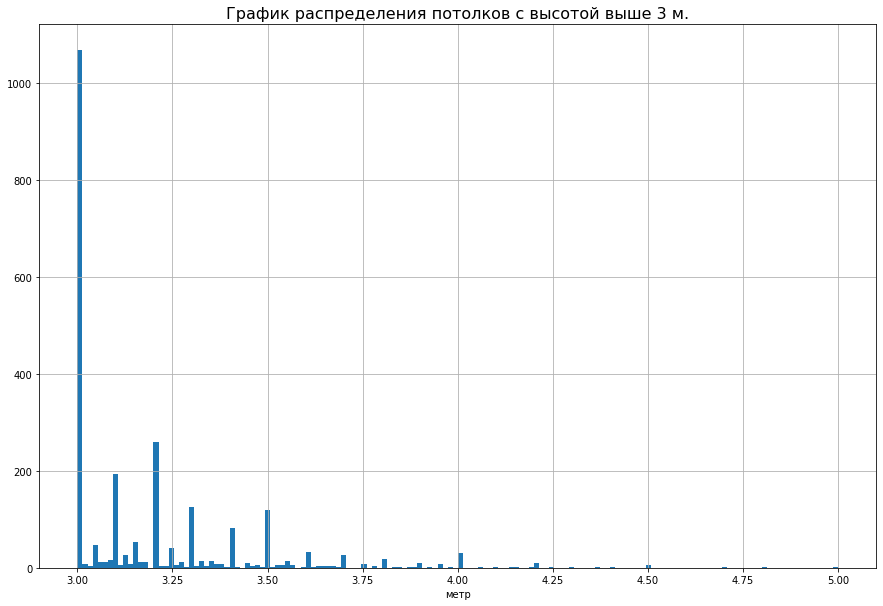

In [31]:
fig = plt.figure()
ax = data.ceiling_height.hist(bins = 150, range = (3,5),)
ax.set_title('График распределения потолков с высотой выше 3 м.', fontsize=16)
ax.set_xlabel('метр')
fig.set_figwidth(15) 
fig.set_figheight(10) 
print(f"99% потолков соответсвуют высоте: {data['ceiling_height'].quantile(.99)} м.")

По нормам высота потолка не должна быть меньше `2.5м`. При этом максимальная потолка в теории может быть любой.  `99%` данных соответствуют высоте до ~`3.5м`, где наблюдается последний сильный выпад. Можно отбросить все данные, где потолки выше или ниже задорного порога. Однако, стоит учитывать и человеческие ошибки. Разделим  все строки, где потолок выше 10 метров на 10 и проверим, сколько данных не соответствуют выбранному порогу:

In [32]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data.loc[data['ceiling_height'] > 10, 'ceiling_height'] / 10
print(f"Количество объектов с потолками выше нормы: {data.query('ceiling_height > 3.6')['total_images'].count()}\
      \nКоличество объектов с потолками ниже нормы: {data.query('ceiling_height < 2.5')['total_images'].count()}")

Количество объектов с потолками выше нормы: 164      
Количество объектов с потолками ниже нормы: 78


Можно заменить некорректные значения на среднее. Однако, можно ли доверять другим данным, если в высоте потолков допущена ошибка, которая не поддается объяснению? Удалим `84` строки, которые не соответствуют условию. Оставшиеся строки заполним медианой сгруппированной по посёлку. 

In [33]:
data = (
    data.loc[(data['ceiling_height'].isna() == True) | 
             ((data['ceiling_height'] >= 2.5) & 
              (data['ceiling_height'] <= 3.5))]
)

### Было
#data.loc[(data['ceiling_height'].isna() == True), 'ceiling_height'] = data['ceiling_height'].median()

### Стало
for value in data['locality_name'].unique():
    data.loc[(data['locality_name'] == value) & (data.ceiling_height.isna()), 'ceiling_height'] = \
          data.loc[(data['locality_name'] == value), 'ceiling_height'].median()
### Осталось 97 "уникальных" пустых объектов.
data.loc[(data['ceiling_height'].isna() == True), 'ceiling_height'] =data.loc[(data['ceiling_height'].isna() == False), 'ceiling_height'] 

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

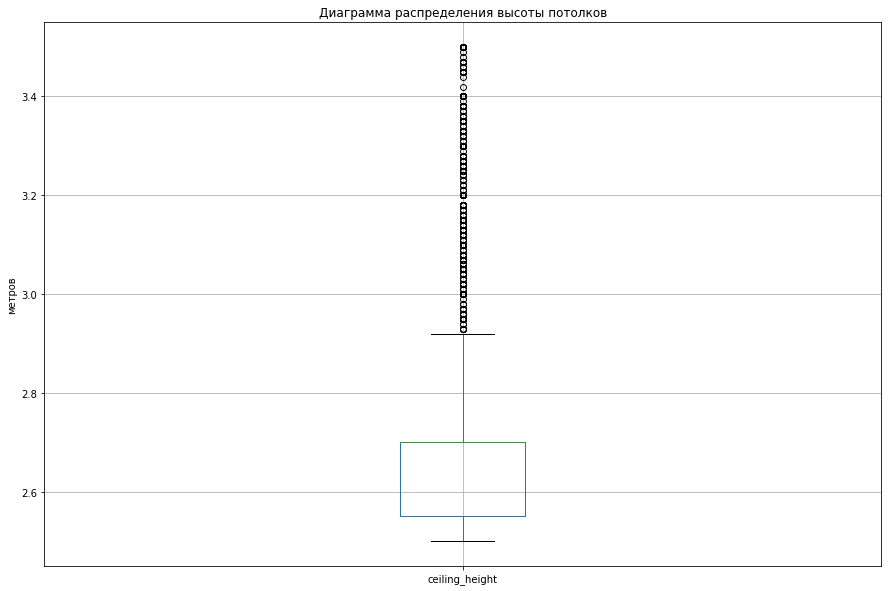

In [34]:
fig = plt.figure()
data.boxplot(column='ceiling_height', figsize=(10,5), grid=True)
plt.title('Диаграмма распределения высоты потолков')
fig.set_figwidth(15) 
fig.set_figheight(10) 
plt.ylabel('метров')
plt.show() 

#### <a id='toc1_1_2_7_'></a>Балконы        [](#toc0_)

Исправим данные в колонке `balcony`. Вероятно, что пропуски в количестве балконов означает их отсутствие. Заменен все пропуски на `0`.

In [35]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)

#### Общая площадь, жилая площадь, кухня

`total_area`, `living_area`, `kitchen_area` - следующие данные для анализа. Посмотрим на них детально:

In [36]:
data[['total_area','living_area','kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,"23,033.000","21,190.000","20,819.000"
mean,57.933,33.126,10.294
std,27.850,18.162,5.126
min,12.000,2.000,1.300
25%,40.000,18.500,7.000
50%,51.200,30.000,9.000
75%,68.000,42.000,11.800
max,460.800,279.600,100.700


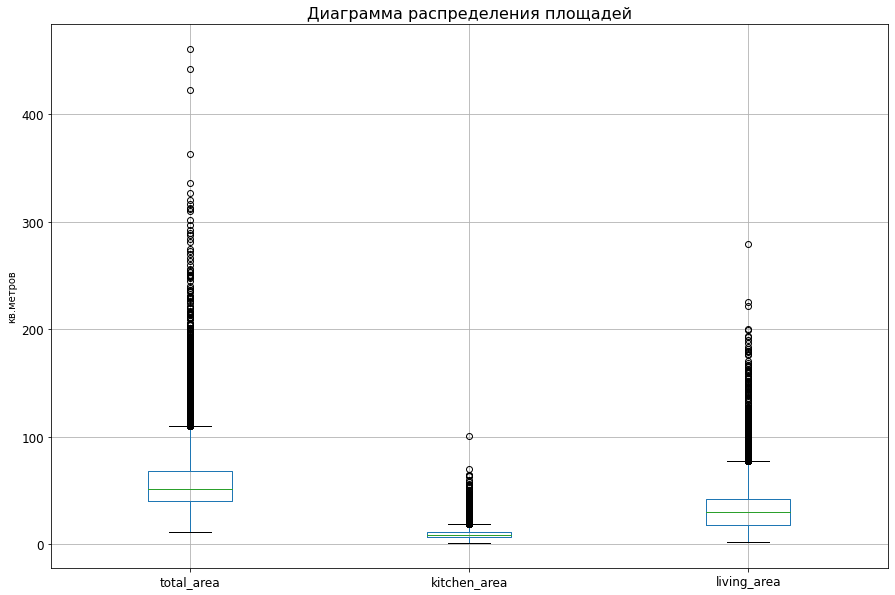

In [37]:
fig = plt.figure()
data.boxplot(column=['total_area','kitchen_area', 'living_area'], fontsize=12, grid=True)
plt.title('Диаграмма распределения площадей', fontsize=16)
fig.set_figwidth(15) 
fig.set_figheight(10) 
plt.ylabel('кв.метров')
plt.show() 

Text(0.5, 0, 'кв.м.')

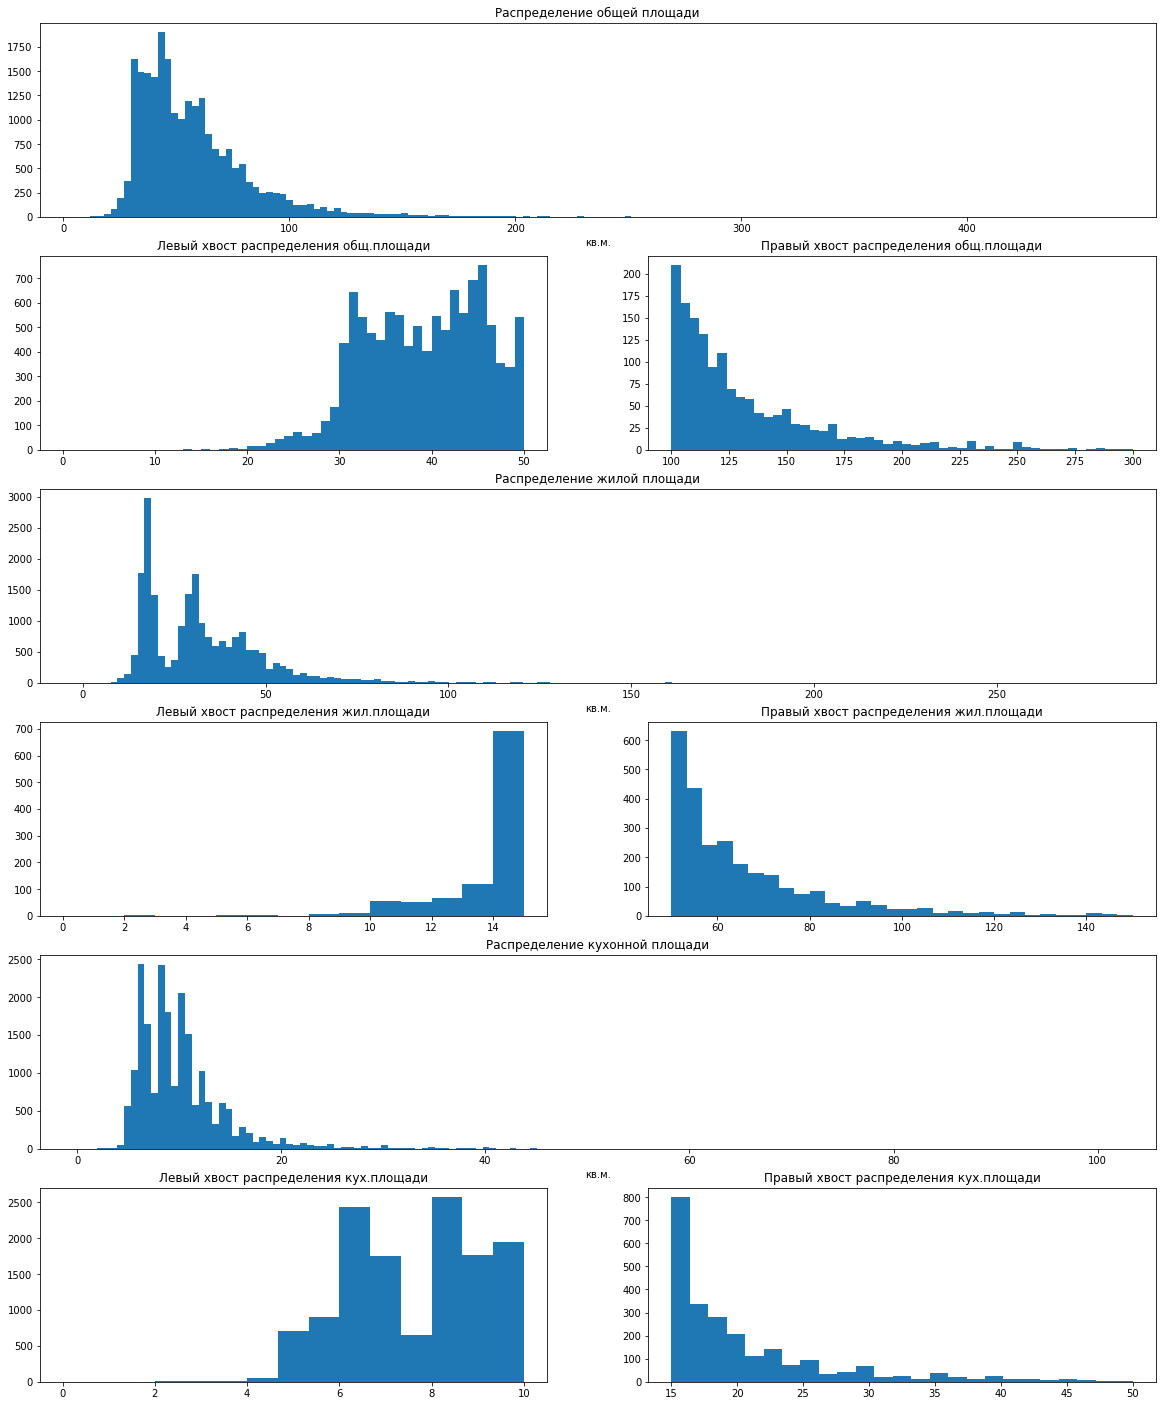

In [38]:
fig = plt.figure()
fig.set_figwidth(20) 
fig.set_figheight(25) 

ax_1 = fig.add_subplot(6, 1, 1)
ax_2 = fig.add_subplot(6, 2, 3)
ax_3 = fig.add_subplot(6, 2, 4)
ax_4 = fig.add_subplot(6, 1, 3)
ax_5 = fig.add_subplot(6, 2, 7)
ax_6 = fig.add_subplot(6, 2, 8)
ax_7 = fig.add_subplot(6, 1, 5)
ax_8 = fig.add_subplot(6, 2, 11)
ax_9 = fig.add_subplot(6, 2, 12)

ax_1.hist(x=data.total_area,bins = 150)
ax_2.hist(x=data.total_area,bins = 50, range=(0,50))
ax_3.hist(x=data.total_area,bins = 50, range=(100, 300))
ax_4.hist(x=data.living_area,bins = 150)
ax_5.hist(x=data.living_area,bins = 15, range=(0,15))
ax_6.hist(x=data.living_area,bins = 30, range=(50,150))
ax_7.hist(x=data.kitchen_area,bins = 150)
ax_8.hist(x=data.kitchen_area,bins = 15, range=(0,10))
ax_9.hist(x=data.kitchen_area,bins = 25, range=(15,50))


ax_1.set(title='Распределение общей площади')
ax_2.set(title='Левый хвост распределения общ.площади')
ax_3.set(title='Правый хвост распределения общ.площади')

ax_4.set(title='Распределение жилой площади')
ax_5.set(title='Левый хвост распределения жил.площади')
ax_6.set(title='Правый хвост распределения жил.площади')

ax_7.set(title='Распределение кухонной площади')
ax_8.set(title='Левый хвост распределения кух.площади')
ax_9.set(title='Правый хвост распределения кух.площади')

ax_1.set_xlabel('кв.м.')
ax_4.set_xlabel('кв.м.')
ax_7.set_xlabel('кв.м.')

Проверим,есть ли квартиры, где общая площадь меньше, чем жилая и площадь кухни вместе взятая. Также проверим, есть ли объекты, где кухня больше жилой площади.   

In [39]:
print(f"Количество объектов, где общая площадь меньше совокупной кухонной и жилой: {data.query('living_area + kitchen_area > total_area')['total_images'].count()}")
print(f"Количество объектов, где жилая площадь меньше кухонной: {data.query('living_area < kitchen_area')['total_images'].count()}")

Количество объектов, где общая площадь меньше совокупной кухонной и жилой: 63
Количество объектов, где жилая площадь меньше кухонной: 332


Исправим обнаруженные ошибки. Квартиры площадью больше `250 кв.м` редкость или менее `20 кв.м.` являются редкостью, отбросим их. Заполним пропуски в жилой площади и площади кухни средним отношением этих площадей к общей площади.

In [40]:
data = data.loc[(data['total_area'] < 250) & (data['total_area'] > 20)]
kitchen_area_mean = (data['kitchen_area']/data['total_area']).mean()
living_area_mean = (data['living_area']/data['total_area']).mean()
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = kitchen_area_mean * (data.loc[data['kitchen_area'].isna(), 'total_area'])
data.loc[data['living_area'].isna(), 'living_area'] = living_area_mean * (data.loc[data['living_area'].isna(), 'total_area'])
data.loc[data.kitchen_area > data.living_area, ['living_area','kitchen_area']] = \
    list(zip(*[data.loc[data.kitchen_area > data.living_area, 'kitchen_area'], data.loc[data.kitchen_area > data.living_area, 'living_area']]))
data.loc[(data['living_area'] + data['kitchen_area']) > data['total_area'] * .9, 'total_area'] = \
    data.loc[(data['living_area'] + data['kitchen_area']) > data['total_area'] * .9, 'living_area'] \
        + data.loc[data['living_area'] + data['kitchen_area'] > data['total_area'] * .9, 'kitchen_area']
data = data.query('living_area < 130 & living_area > 10 & total_area < 250 & total_area > 20 & kitchen_area > 4 & kitchen_area < 40')

In [41]:
print(f"Количество объектов, где общая площадь меньше совокупной кухонной и жилой: {data.query('living_area + kitchen_area > total_area')['total_images'].count()}")
print(f"Количество объектов, где жилая площадь меньше кухонной: {data.query('living_area < kitchen_area')['total_images'].count()}")

Количество объектов, где общая площадь меньше совокупной кухонной и жилой: 0
Количество объектов, где жилая площадь меньше кухонной: 0


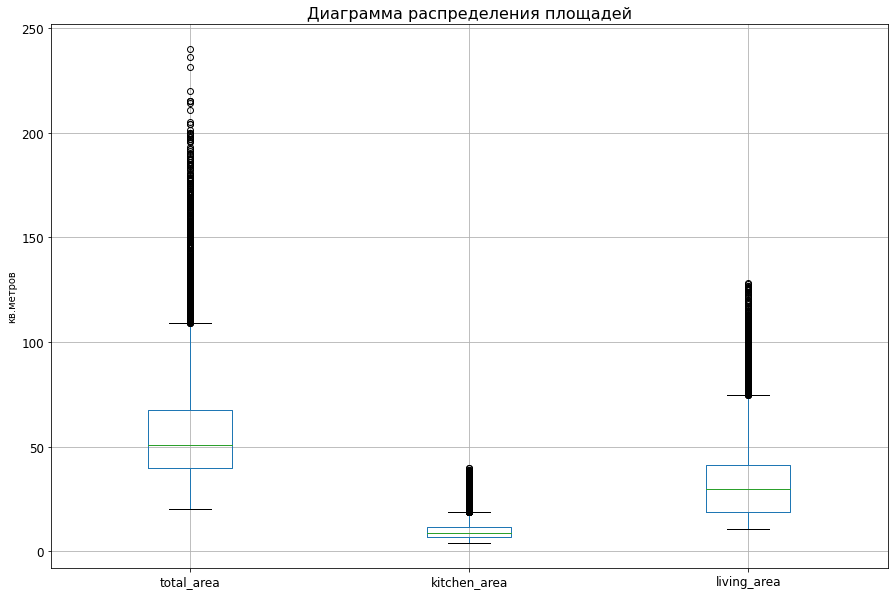

In [42]:
fig = plt.figure()
data.boxplot(column=['total_area','kitchen_area', 'living_area'], fontsize=12, grid=True)
plt.title('Диаграмма распределения площадей', fontsize=16)
fig.set_figwidth(15) 
fig.set_figheight(10) 
plt.ylabel('кв.метров')
plt.show() 

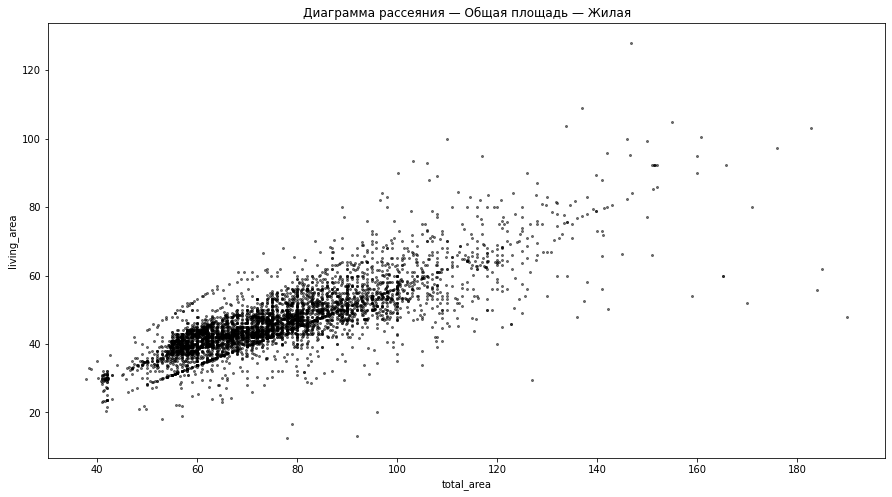

In [43]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

#### <a id='toc1_1_2_8_'></a>Сколько времени просуществовало объявление        [](#toc0_)

Пропуски в `days_exposition` означают, что объект так и не был продан. Можно выбрать произвольный день (например сегодня) или последний день в датасете, однако колонка потеряет свою наглядность. В связи с чем добавим ещё две колонки: `days_exposition_life` - сколько не снятой объявление существует на текущий и `days_exposition_status`, которая будет показывать продан объект или нет. 

In [44]:
data['days_exposition'].describe()

count             19,778.000
mean                 178.315
std                  216.906
min                    1.000
25%                   45.000
50%                   94.000
75%                  227.000
max                1,580.000
Name: days_exposition, dtype: float64

In [45]:
amount = data.query('days_exposition>days_exposition.quantile(.99)')['total_images'].count()
price =  data.days_exposition.quantile(.99)
print('99% всех объектов были проданы за срок до {:,.0f} дня.'.format(price))
print('Количество объектов, которые продаются дольше, чем {:,.0f} дня, составляет: {}' \
      .format(price,amount))

99% всех объектов были проданы за срок до 1,057 дня.
Количество объектов, которые продаются дольше, чем 1,057 дня, составляет: 198


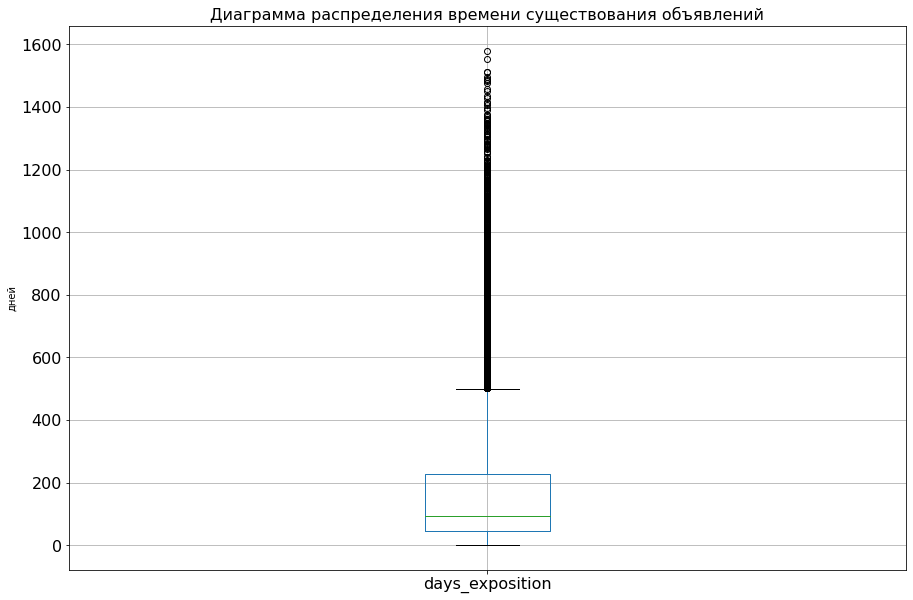

In [46]:
fig = plt.figure()
data.boxplot(column='days_exposition', fontsize=16, grid=True)
plt.title('Диаграмма распределения времени существования объявлений',fontsize=16)
fig.set_figwidth(15) 
fig.set_figheight(10) 
plt.ylabel('дней')
plt.show() 

Text(0.5, 0, 'дней')

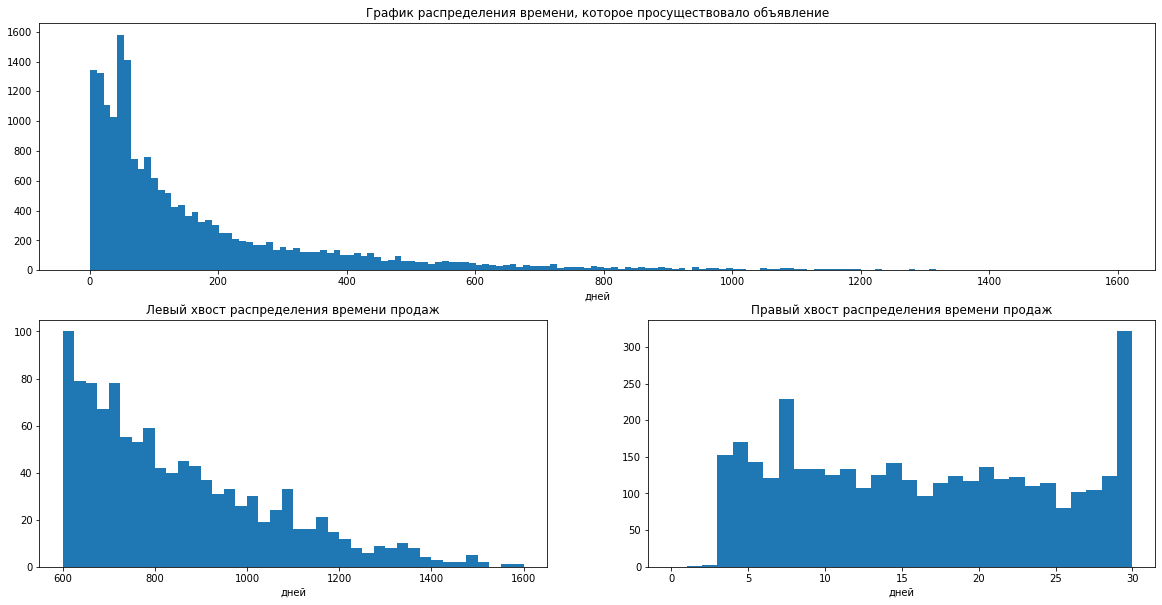

In [47]:
fig = plt.figure()
fig.set_figwidth(20) 
fig.set_figheight(10) 

ax_1 = fig.add_subplot(2, 1, 1)
ax_2 = fig.add_subplot(2, 2, 3)
ax_3 = fig.add_subplot(2, 2, 4)

ax_1.hist(x = data.days_exposition, bins = 150)
ax_2.hist(x = data.days_exposition, bins = 40,range=(600,1600))
ax_3.hist(x = data.days_exposition, bins = 30, range=(0,30))

ax_1.set(title='График распределения времени, которое просуществовало объявление')
ax_2.set(title='Левый хвост распределения времени продаж')
ax_3.set(title='Правый хвост распределения времени продаж')
ax_1.set_xlabel('дней')
ax_2.set_xlabel('дней')
ax_3.set_xlabel('дней')

In [48]:
data['days_exposition_life'] = (data.loc[data['days_exposition'].isna() ,'first_day_exposition'].max() \
                                - data.loc[data['days_exposition'].isna() ,'first_day_exposition']).dt.days
data['days_exposition_status'] = np.where(data.days_exposition.isna(), True, False)

In [49]:
data = data.query('days_exposition > 2 | days_exposition.isna() | days_exposition < 1200')

Text(0.5, 1.0, 'График продолительности продажи объектов')

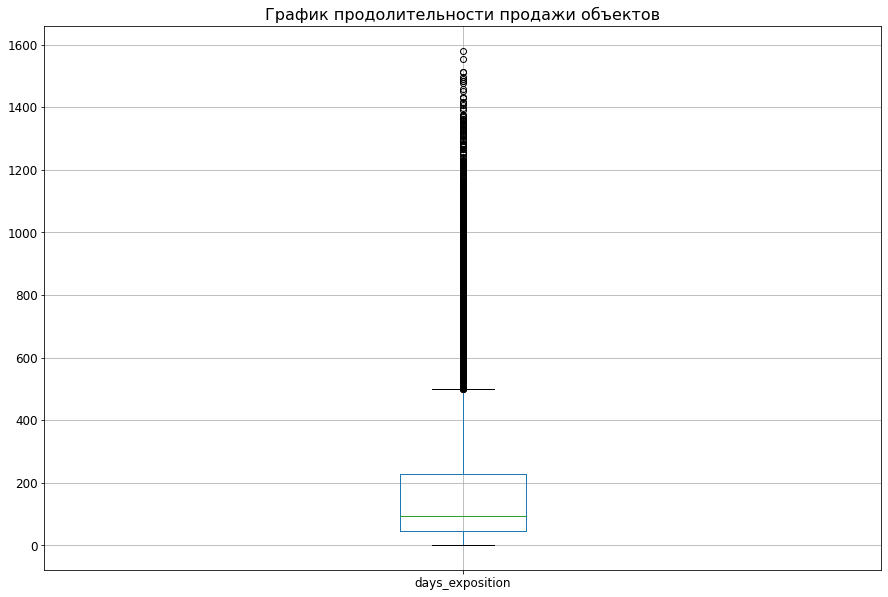

In [50]:
fig = plt.figure()
data.boxplot(column='days_exposition',fontsize=12)
fig.set_figwidth(15) 
fig.set_figheight(10) 
plt.title('График продолительности продажи объектов',fontsize=16)

#### <a id='toc1_1_2_9_'></a>Этажы        [](#toc0_)

Далее перейдём к `floor` и `total_floors`. Первым делом проверим, есть ли квартиры на этаже выше, чем всего этажей в здании. 

In [51]:
print(f"Этаж объекта выше, чем всего этажей:{data.loc[data['floors_total'] < data['floor'], 'floor'].count()}")

Этаж объекта выше, чем всего этажей:0


In [52]:
data.query('floors_total.isna()')['total_images'].count()

80

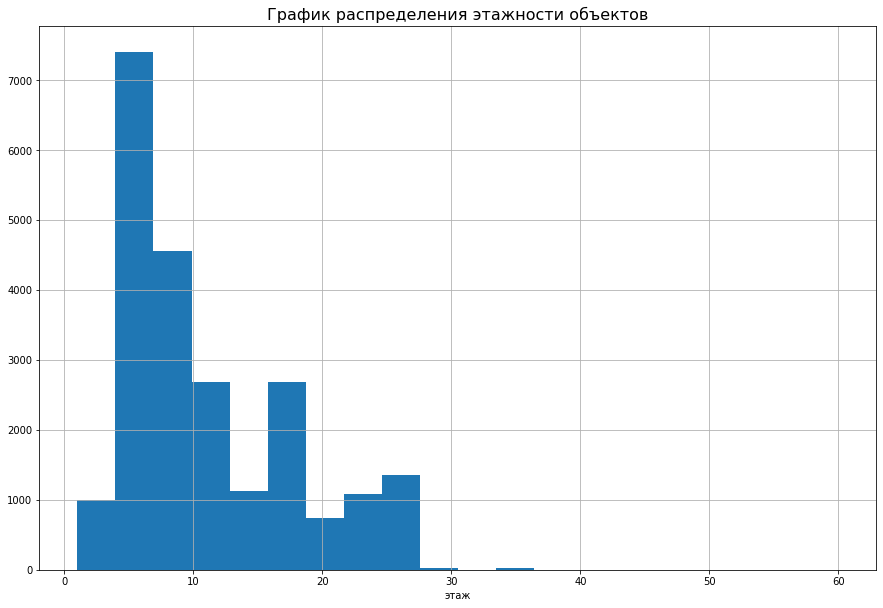

In [53]:
fig = plt.figure()
ax = data.floors_total.hist(bins=20)
ax.set_title('График распределения этажности объектов',fontsize=16)
ax.set_xlabel('этаж')
fig.set_figwidth(15) 
fig.set_figheight(10) 

Количество пропусков небольшое. Избавляемся от них и изменяем тип данных.

In [54]:
data = data.query('floors_total.isna() == False & floors_total < 35')
data['floors_total'] = data['floors_total'].astype(int)

#### <a id='toc1_1_2_10_'></a>Комнаты        [](#toc0_)

Проанализируем данные, которые хранят количество комнат - `room`. 

Минимальное количество комнат, согласен представленному в начале `data.describe()` - 0. Проверим:

In [55]:
print(f"Количество не студий и не объектов со свободной планировкой, где количество комнат равно нулю: {data.query('rooms==0 & studio==False & open_plan==False')['total_images'].count()}")
print(f"Количество объектов, где количество комнат больше семи: {data.query('rooms > 7')['total_images'].count()}")

Количество не студий и не объектов со свободной планировкой, где количество комнат равно нулю: 0
Количество объектов, где количество комнат больше семи: 2


Таким образом, ошибки здесь нет. Максимальное количество комнат выглядит адекватно, однако имеется всего 11 объектов, где количество комнат больше 7. Их можно отбросить.

In [56]:
data = data.query('rooms <= 7')

#### <a id='toc1_1_2_11_'></a>Автоматические данные: парки, пруды и аэропорт        [](#toc0_)

In [57]:
print(f"Количество неоправданных пропусков в данных о парках: {data.query('parks_around3000 > 0 & parks_nearest.isna()')['total_images'].count()}")
print(f"Количество неоправданных пропусков в данных о прудах: {data.query('ponds_around3000 > 0 & ponds_nearest.isna()')['total_images'].count()}")

Количество неоправданных пропусков в данных о парках: 0
Количество неоправданных пропусков в данных о прудах: 0


Таким образом пропуски там, либо в целом нет данных о парках, прудах или аэропортах, либо там, где их количество равно 0.

Проверим минимальное расстояние до аэропорта:

In [58]:
data.query('airports_nearest<5000')['airports_nearest']

21085                  0.000
Name: airports_nearest, dtype: float64

Имеется один объект, который находится в `0 км` от аэропорта. Уберем данную строку:

In [59]:
data = data.query('airports_nearest>5000 | airports_nearest.isna()')

После обработки всех данных удаляем явные дубликаты, если они остались:

In [60]:
data.drop_duplicates(inplace=True)

#### <a id='toc1_1_2_12_'></a>Итог переработки данных        [](#toc0_)

Проверим данные ещё раз:

In [61]:
data.isna().mean().sort_values(ascending=False).map(lambda x: '{:.2%}'.format(x))

days_exposition_life         86.85%
parks_nearest                66.97%
ponds_nearest                62.72%
airports_nearest             24.01%
city_centers_nearest         23.92%
ponds_around3000             23.91%
parks_around3000             23.91%
days_exposition              13.15%
ceiling_height                0.43%
total_images                  0.00%
year_first_exposition         0.00%
month_of_first_exposition     0.00%
weekday_first_exposition      0.00%
locality_name                 0.00%
last_price                    0.00%
balcony                       0.00%
kitchen_area                  0.00%
open_plan                     0.00%
studio                        0.00%
floor                         0.00%
living_area                   0.00%
floors_total                  0.00%
rooms                         0.00%
first_day_exposition          0.00%
total_area                    0.00%
days_exposition_status        0.00%
dtype: object

In [62]:
print('Количество строк в неочищенном дата фрейме: {}. Количество в отчищенном дата фрейме: {}. Сохранность информации составила: {:,.02%}'\
    .format(shape_dirty,data.shape[0],data.shape[0] / shape_dirty))

Количество строк в неочищенном дата фрейме: 23699. Количество в отчищенном дата фрейме: 22664. Сохранность информации составила: 95.63%


Таким образом, в результате переработки информации все аномалии и редкие значения были исправлены или удалены, пропуски заполнены. Сохранность информации составила: `95.63%`.

#### check gap

In [63]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22664 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               22664 non-null  int64         
 1   last_price                 22664 non-null  float64       
 2   total_area                 22664 non-null  float64       
 3   first_day_exposition       22664 non-null  datetime64[ns]
 4   rooms                      22664 non-null  int64         
 5   ceiling_height             22567 non-null  float64       
 6   floors_total               22664 non-null  int64         
 7   living_area                22664 non-null  float64       
 8   floor                      22664 non-null  int64         
 9   studio                     22664 non-null  bool          
 10  open_plan                  22664 non-null  bool          
 11  kitchen_area               22664 non-null  float64       
 12  balc

In [64]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,664.00","22,664.00","22,567.00","19,683.00","22,664.00","22,664.00","22,664.00","22,664.00","22,664.00"
min,0.00,20.07,2.50,1.00,"430,000.00",10.50,4.01,1.00,1.00
max,7.00,240.00,3.50,"1,580.00","30,891,300.00",128.00,39.90,32.00,34.00
median,2.00,51.00,2.70,94.00,"4,589,500.00",30.00,9.00,4.00,9.00


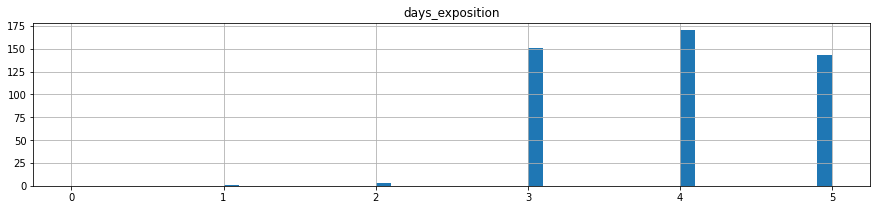

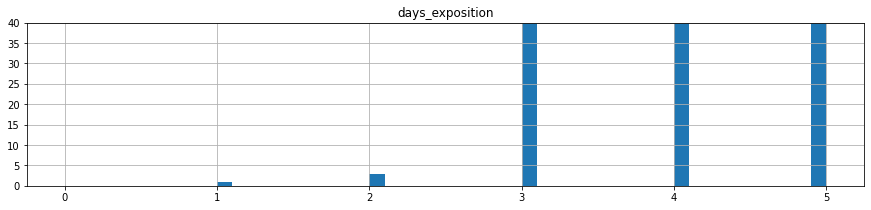

In [65]:
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40)

In [66]:
data.describe().loc[data.describe().index == '50%',['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
50%,2.000,51.000,2.700,94.000,"4,589,500.000",30.000,9.000,4.000,9.000


In [73]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,22.00,2.50,3.00,"567,934.00",11.90,4.20,1.00,2.00
0.01,1.00,26.00,2.50,4.00,"1,000,000.00",14.00,4.90,1.00,2.00
0.5,2.00,51.00,2.70,94.00,"4,589,500.00",30.00,9.00,4.00,9.00
0.99,5.00,149.24,3.35,"1,055.36","22,000,000.00",90.00,28.00,23.00,26.00
0.9988,6.00,192.08,3.50,"1,361.38","29,000,000.00",118.82,36.24,26.00,27.00


### <a id='toc1_1_3_'></a>Часть 3. Добавление новых столбцов в таблицу       [](#toc0_)

In [74]:
### Рассчитывает стоимость квадратного метра для каждого объекта
data['price_per_square_meter'] = data['last_price'] / data['total_area']


### Делим этажи по категориям 
data['type_of_floor'] =  np.where(data.floor == 1, 'первый', 
                                  np.where(data.floor == data.floors_total, 'последний', 
                                           np.where(data.floor <= 0, 'цокольный', 'другой')))


### Расчитываем расстояние до центра в киллометрах
data['city_center_km'] = (data['city_centers_nearest'] / 1000).round()

### <a id='toc1_1_4_'></a>Часть 4. Исследовательский анализ данных      [](#toc0_)

Посмотрим исправленные гистограммы распределений:

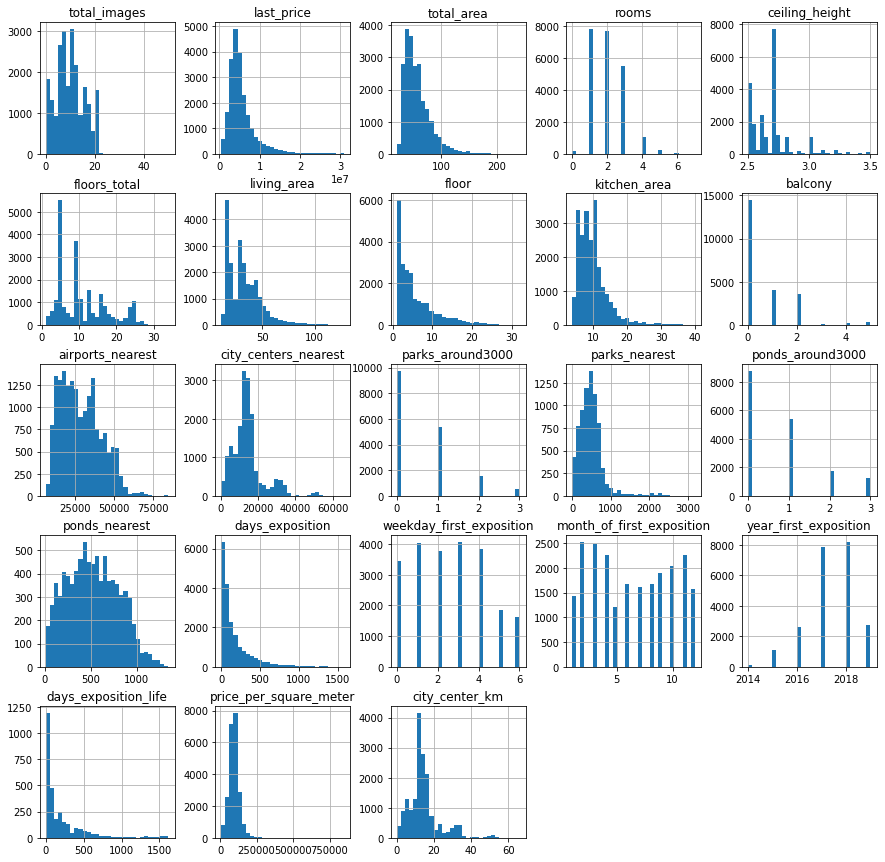

In [75]:
ax = data.loc[:, data.columns != 'first_day_exposition'].hist(figsize=(15,15), bins=30)

Не все графики информативны. Построим некоторые гистограмм более детально:

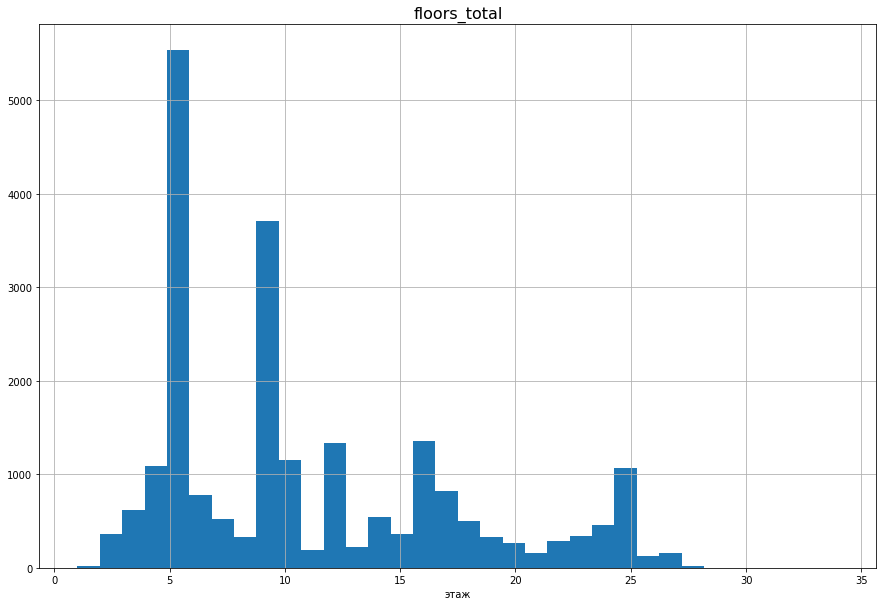

In [76]:
fig = plt.figure()
ax = data['floors_total'].hist(bins=data['floors_total'].max())
ax.set_title('floors_total',fontsize=16)
ax.set_xlabel('этаж')
fig.set_figwidth(15) 
fig.set_figheight(10) 

In [77]:
data['floors_total'].value_counts().head(10)

5     5537
9     3706
16    1360
12    1338
10    1157
4     1093
25    1064
17     823
6      774
3      622
Name: floors_total, dtype: int64

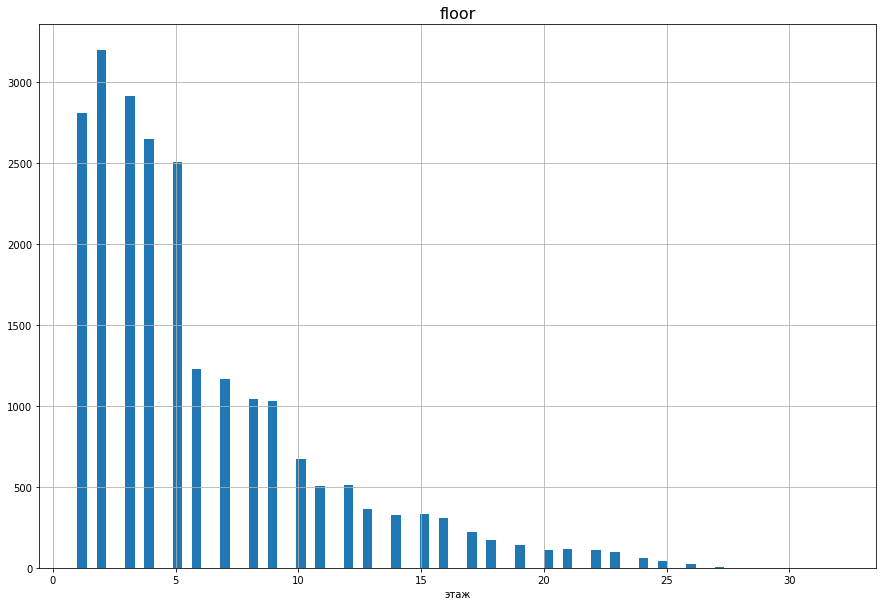

In [78]:
fig = plt.figure()
ax = data['floor'].hist(bins=80)
ax.set_title('floor',fontsize=16)
ax.set_xlabel('этаж')
fig.set_figwidth(15) 
fig.set_figheight(10) 

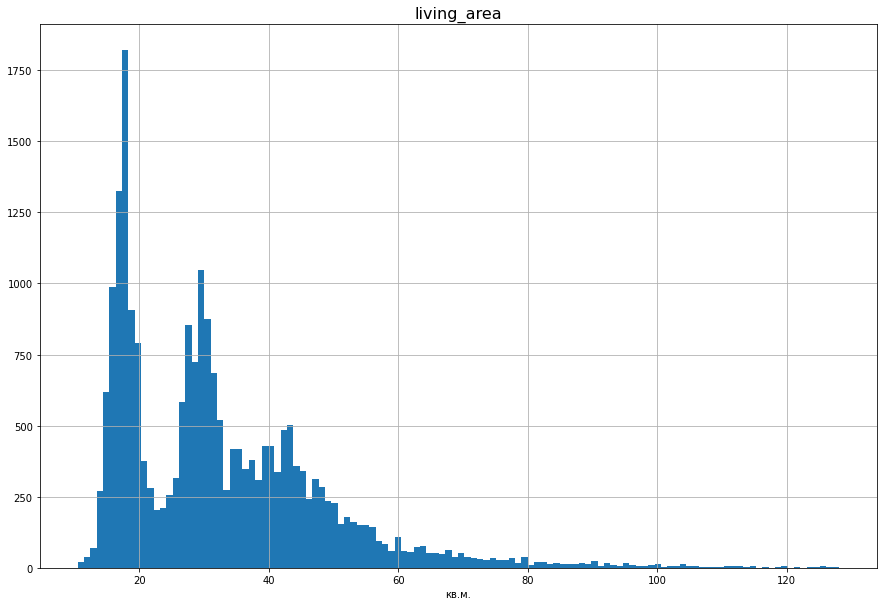

In [79]:
fig = plt.figure()
ax = data['living_area'].hist(bins=120)
ax.set_title('living_area',fontsize=16)
ax.set_xlabel('кв.м.')
fig.set_figwidth(15) 
fig.set_figheight(10) 

In [80]:
data['living_area'].value_counts().head(10)

18.000    874
17.000    673
30.000    599
20.000    482
16.000    476
28.000    417
31.000    375
19.000    327
29.000    312
32.000    311
Name: living_area, dtype: int64

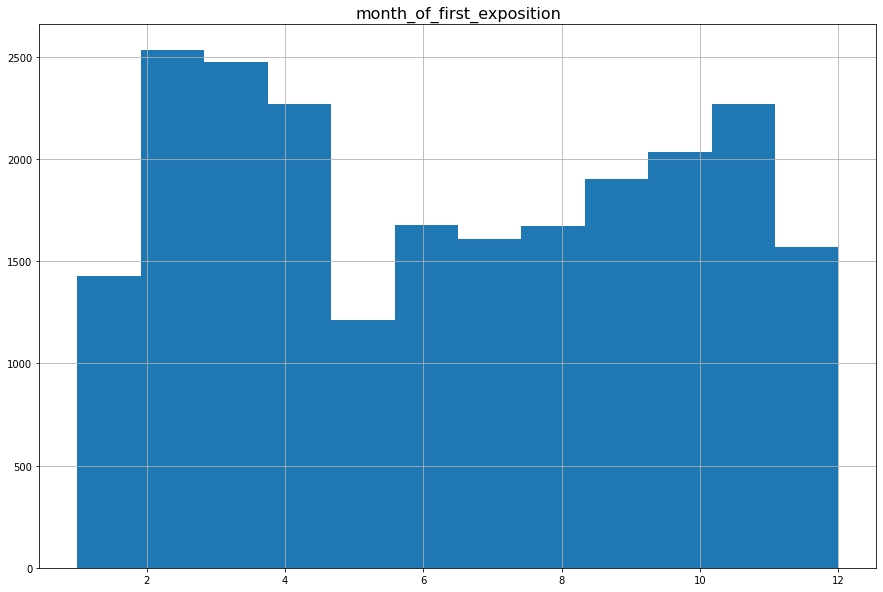

In [81]:
fig = plt.figure()
data['month_of_first_exposition'].hist(bins=12)
plt.title('month_of_first_exposition',fontsize=16)
fig.set_figwidth(15) 
fig.set_figheight(10) 

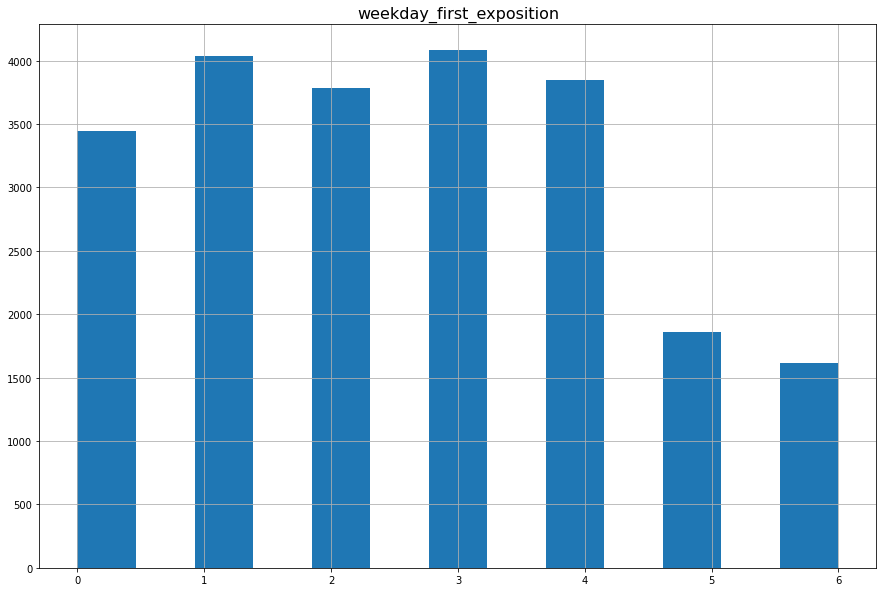

In [82]:
fig = plt.figure()
data['weekday_first_exposition'].hist(bins=13)
plt.title('weekday_first_exposition',fontsize=16)
fig.set_figwidth(15) 
fig.set_figheight(10) 

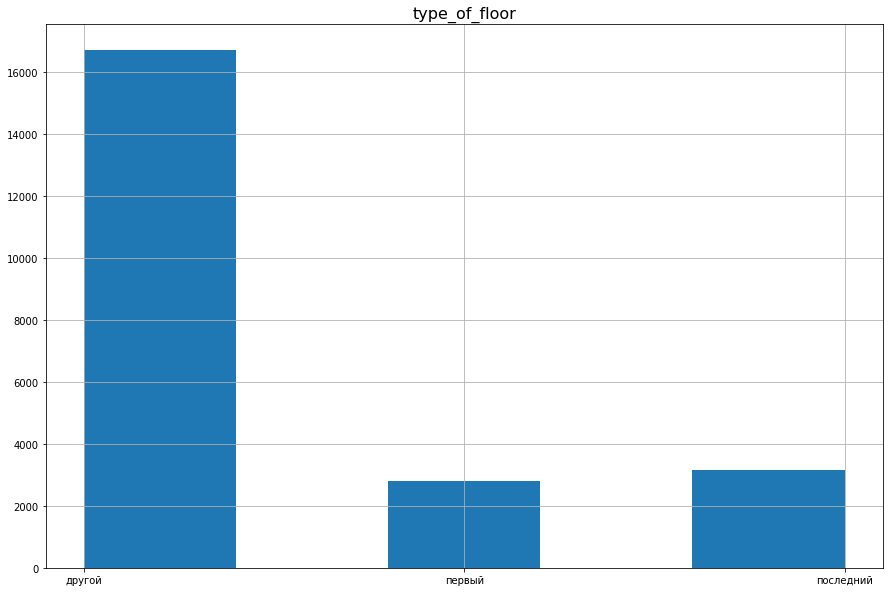

In [83]:
fig = plt.figure()
data['type_of_floor'].hist(bins=5)
plt.title('type_of_floor',fontsize=16)
fig.set_figwidth(15) 
fig.set_figheight(10) 

In [84]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_first_exposition,month_of_first_exposition,year_first_exposition,days_exposition_life,price_per_square_meter,city_center_km
count,"22,664.000","22,664.000","22,664.000","22,664.000","22,567.000","22,664.000","22,664.000","22,664.000","22,664.000","22,664.000","17,223.000","17,243.000","17,244.000","7,487.000","17,244.000","8,449.000","19,683.000","22,664.000","22,664.000","22,664.000","2,981.000","22,664.000","17,243.000"
mean,9.835,"5,608,582.542",57.099,2.017,2.685,10.768,32.769,5.909,10.051,0.599,"28,904.429","14,478.556",0.585,495.119,0.739,525.827,178.312,2.568,6.403,"2,017.379",207.685,"96,037.271",14.473
std,5.639,"3,807,732.617",24.730,0.975,0.174,6.558,16.160,4.879,4.403,0.961,"12,779.086","8,537.813",0.779,343.597,0.916,276.713,216.889,1.789,3.492,1.031,293.320,"35,651.678",8.547
min,0.000,"430,000.000",20.066,0.000,2.500,1.000,10.500,1.000,4.010,0.000,"6,450.000",287.000,0.000,1.000,0.000,13.000,1.000,0.000,1.000,"2,014.000",0.000,"7,962.963",0.000
25%,6.000,"3,400,000.000",40.000,1.000,2.550,5.000,19.000,2.000,7.000,0.000,"18,398.000","9,801.500",0.000,292.000,0.000,304.000,45.000,1.000,3.000,"2,017.000",30.000,"76,040.945",10.000
50%,9.000,"4,589,500.000",51.000,2.000,2.700,9.000,30.000,4.000,9.000,0.000,"27,038.000","13,256.000",0.000,456.000,0.000,510.000,94.000,3.000,6.000,"2,017.000",80.000,"94,332.692",13.000
75%,14.000,"6,500,000.000",67.600,3.000,2.700,16.000,41.300,8.000,11.600,1.000,"37,434.000","16,419.000",1.000,616.000,1.000,736.000,227.000,4.000,10.000,"2,018.000",261.000,"112,857.143",16.000
max,50.000,"30,891,300.000",240.000,7.000,3.500,34.000,128.000,32.000,39.900,5.000,"84,869.000","65,968.000",3.000,"3,190.000",3.000,"1,344.000","1,580.000",6.000,12.000,"2,019.000","1,618.000","848,484.848",66.000


#### <a id='toc1_1_4_1_'></a>Вывод      [](#toc0_)

Из представленных данных можно сделать следующие выводы:  

1. `total_images` в среднем объявление имеет $9$ фотографий. $75$% объявлений имеют $14$ фотографий. Максимальное количество фотографий - $50$ (вероятно, максимально доступное для загрузки на сайт), однако объявлений с фотографий от $15$ до $50$ штук всего $25%$;
2. `last_price` - как можно заметить из гистограммы, основное количество объявлений находится в зоне до $10,000,000$₽, если говорить точнее, то $50$% всех объявлений приходится на цену $4,500,000$₽ и ниже. График имеет достаточно большой хвост, не смотря на то, что он был обрезан. Это свидетельствует о том, что в данных имеется "элитная" недвижимость. Вероятно, для более глубокого анализа стоило разделить данные на две категории: обычную недвижимость и элитную недвижимость. Однако для целей данного исследования это не требуется;
3. `total_area` - общая площадь в среднем составляет `50-60` кв.метров. Данные имеют также больше хвост, однако распределение отличается от распределения `last_price`. Здесь мы наблюдаем более плавное уменьшение количества объявления с ростом площади;
4. `living_area` - данные, которые непрерывно связаны с `total_area`. Распределение почти похожи, кроме одного фактора: большего количества маленьких площадей для жизни. Из этого можно сделать промежуточный вывод, что рост жилой площади сначала не так сильно скорректирован с ростом общей площади. Имеется скопление объектов, с жилой площадью ~ `18` кв.метров. Второй пик приходится на ~ `30` кв.метров. Можно предположить, что это типовые размер квартир;
5. `kitchen_area` - ещё один показатель, связанный с общей площадью. Здесь наблюдается такая же история, однако количество малых кухонь все-таки несколько ниже, чем малых жилых помещений. Вывод можно сделать такой же, как и с `living_area`, при этом "начальная" корреляция тут явно выше;
6. `rooms` - минимальное количество комнат - 0. Это означает, что квартира - студия или со свободной планировкой. `25%` - это недвижимость с одной комнатой или студии, еще `25%` - двухкомнатные квартиры. `75%` квартир - это трехкомнатные (и меньше). Оставшиеся 25% это хвост, который содержит в себе количество комнат от четырех до семи;
7. `ceiling_height` - высота потолков распределена равномерно, после отчистки данных `75%` лежит в диапазоне от 2.5 до 2.7 метров. Еще 25% составляет недвижимость с высотой потолков до 3.5 метров;
8. `total_floors` - пики в гистограмме показывают типовую высоту зданий. Наиболее распространенное количество этажей - 5 и 9;
9. `floor` - в основном недвижимость (75% объявлений) продается до 8 этажа. При этом видно небольшую диспропорцию, количество объявлений на нижних этаж больше и падает достаточно резко. Пик приходится на второй этаж, заметное снижение начинается после пятого этажа. Таким образом, можно сделать вывод, что люди охотнее продают недвижимость на нижних этажах.
10. `type_of_floor` - в основном продают не первый и не последний этаж. Таких объявлений около 6000 в общей сложности;
11. `city_centers_nearest` - большая часть объявлений это недвижимость, которая находится не дальше 20км от центра. Количество таких объявлений больше 75%. При этом на графике распределения видно, что имеется второе скопление объявлений в районе от 20 до 40км, однако оно несравнимо меньше. Чем дальше от центра города, тем меньше объявлений. 
12. `airports_nearest` - Пик - недвижимость в отдалении от аэропорта на 23-24км. При этом 75% принадлежит недвижимости, которая удалена от аэропорта не больше, чем на 26 км. Остальные 25% распределены с плавным убыванием, чем дальше от аэропорта, тем меньше объявлений. 
13. `parks_nearest` - в основном парки находится на расстоянии в один километр от объекта недвижимости
14. `месяц публикации` - здесь можно наблюдать ярко выраженную сезонность. Наибольшее количество объявлений - в феврале и марте. Затем происходит затухание рынка. Минимум наблюдается в мае, затем количество объявлений начинает расти вплоть до ноября. Декабрь и январь традиционно в связи с закрытием года и праздничными днями имеют в среднем  малое количество объявлений. 
15. `день публикации` - объявления практически равномерно распределены по дням. Исключения - суббота и воскресенье. 

Построим heatmap таблицы корреляции:

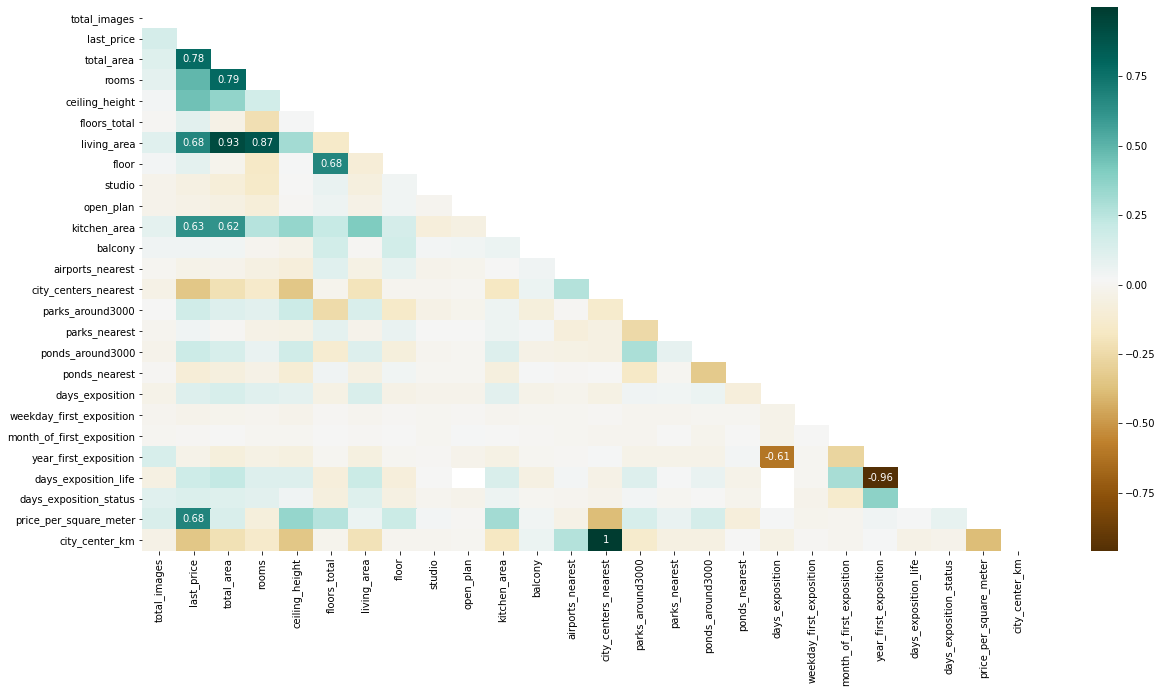

In [85]:
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(data.corr()))
heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, cmap='BrBG')
for t in heatmap.texts:
    if abs(float(t.get_text()))>=0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

### <a id='toc1_1_5_'></a>Как быстро продавались квартиры?      [](#toc0_)

Для начала получим всё вспомогательную информацию:

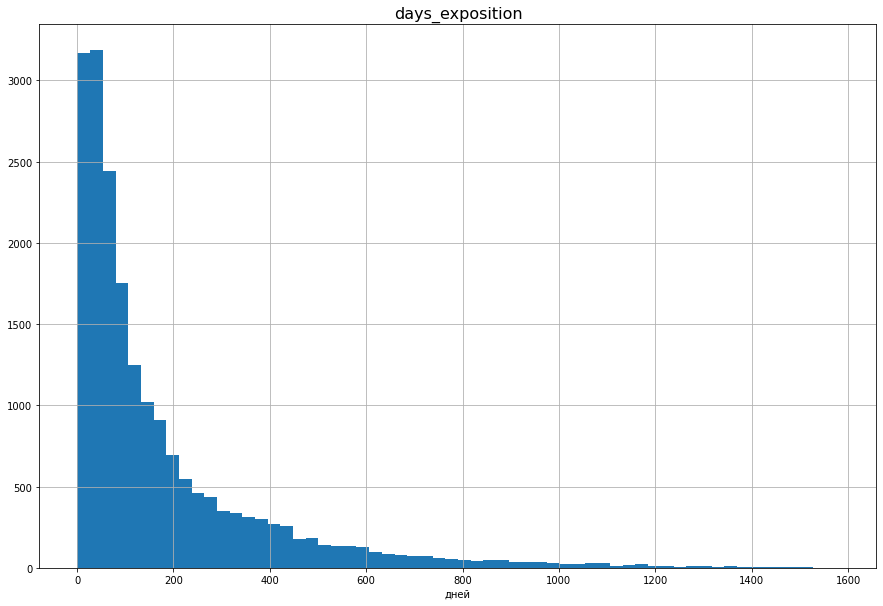

In [86]:
fig = plt.figure()
ax = data['days_exposition'].hist(bins=60, figsize=(10, 8))
ax.set_xlabel('дней')
plt.title('days_exposition',fontsize=16)
fig.set_figwidth(15) 
fig.set_figheight(10) 

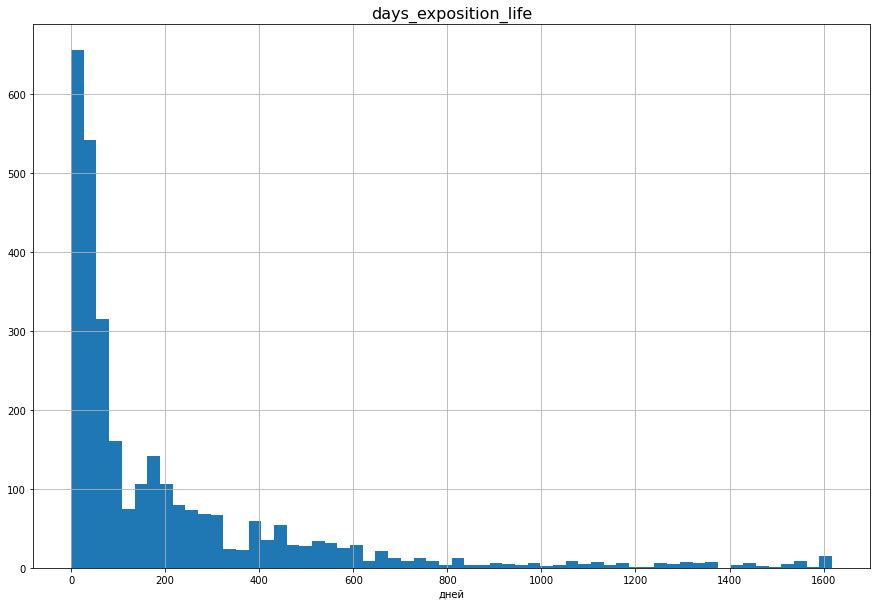

In [87]:
fig = plt.figure()
ax = data['days_exposition_life'].hist(bins=60,figsize=(10, 8))
ax.set_xlabel('дней')
plt.title('days_exposition_life',fontsize=16)
fig.set_figwidth(15) 
fig.set_figheight(10) 

In [88]:
data['days_exposition'].describe()

count             19,683.000
mean                 178.312
std                  216.889
min                    1.000
25%                   45.000
50%                   94.000
75%                  227.000
max                1,580.000
Name: days_exposition, dtype: float64

In [89]:
table_days_exposition = (
    data
    .pivot_table(values=['days_exposition', 'days_exposition_status'], index='year_first_exposition', 
                                                                                          aggfunc= {'days_exposition' : ['mean', 'median'],
                                                                                                     'days_exposition_status' : ['mean','count']})
    )
table_days_exposition.columns = ['mean_days_exposition','median_days_exposition','amount_of_ads','no_sold']
(
    table_days_exposition
    .style
    .format({'no_sold': '{:,.2%}'.format, 'mean_days_exposition' : '{:,.2f}', 'median_days_exposition' : '{:,.2f}'})
)

,mean_days_exposition,median_days_exposition,amount_of_ads,no_sold
year_first_exposition,,,,
2014,910.09,876.00,125,12.00%
2015,646.97,577.50,1082,5.36%
2016,321.48,234.50,2620,2.29%
2017,158.04,102.00,7852,3.03%
2018,93.90,63.00,8224,10.86%
2019,31.02,23.00,2761,62.19%


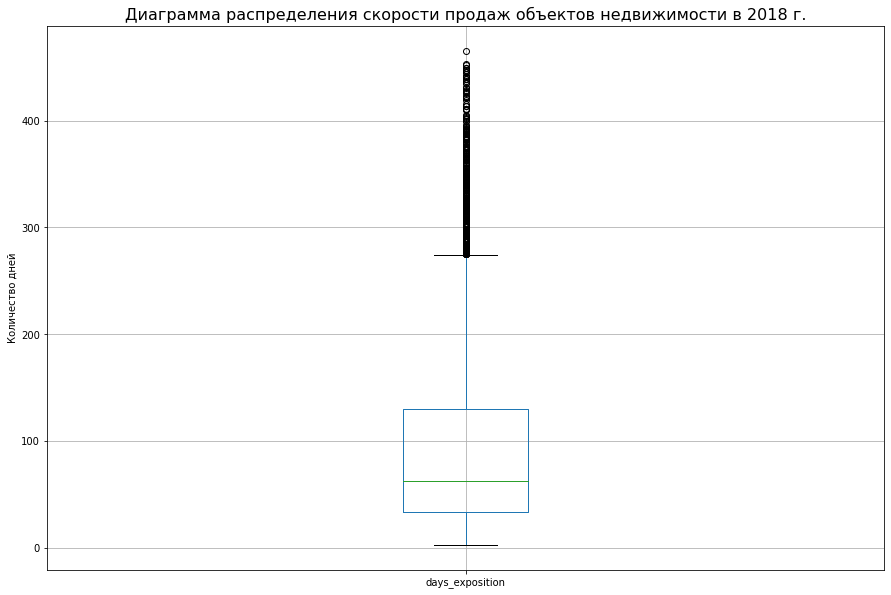

In [90]:
fig = plt.figure()
plt.title('Диаграмма распределения скорости продаж объектов недвижимости в 2018 г.',fontsize=16)
data.loc[data['year_first_exposition'] == 2018].boxplot(column=['days_exposition'], grid=True)
plt.ylabel('Количество дней')
fig.set_figwidth(15) 
fig.set_figheight(10)

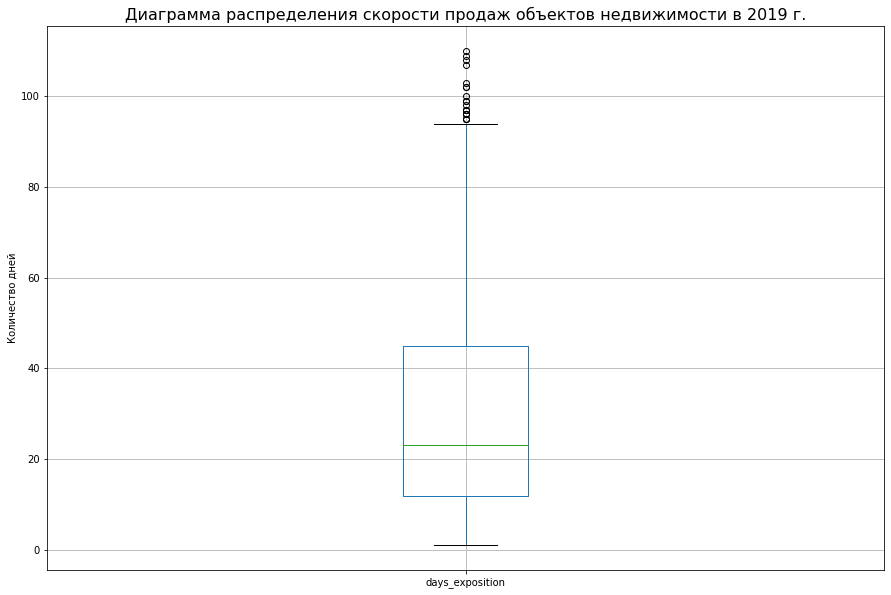

In [91]:
fig = plt.figure()
plt.title('Диаграмма распределения скорости продаж объектов недвижимости в 2019 г.', fontsize=16)
data.loc[data['year_first_exposition'] == 2019].boxplot(column=['days_exposition'], figsize=(10,5), grid=True)
plt.ylabel('Количество дней')
fig.set_figwidth(15) 
fig.set_figheight(10)

In [92]:
data['days_exposition'].quantile([0.1, 0.25, .5, .75, .90, .99])

0.100                 17.000
0.250                 45.000
0.500                 94.000
0.750                227.000
0.900                450.000
0.990              1,055.360
Name: days_exposition, dtype: float64

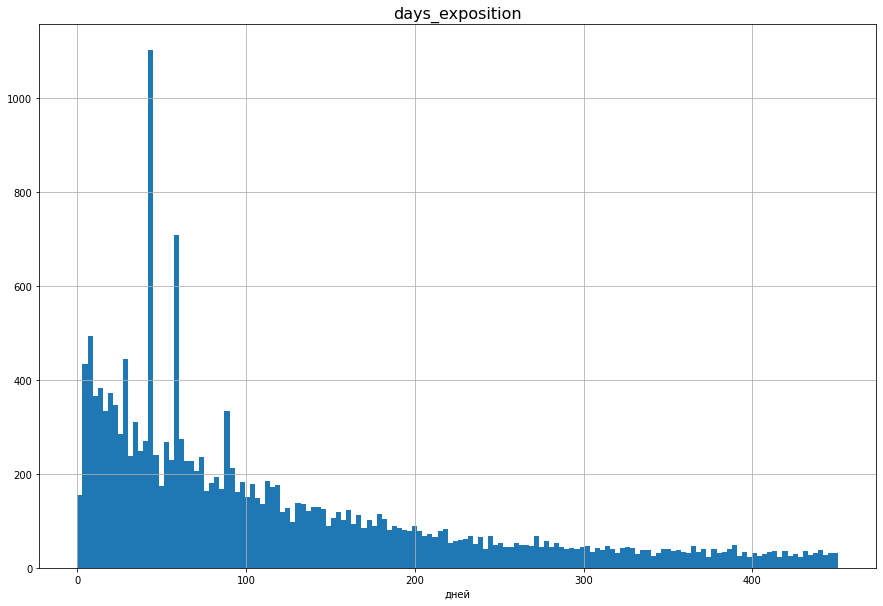

In [93]:
fig = plt.figure()
ax = data['days_exposition'].hist(bins=150, range=(0,451), figsize=(10, 8))
ax.set_title('days_exposition', fontsize=16)
ax.set_xlabel('дней')
fig.set_figwidth(15) 
fig.set_figheight(10)

In [94]:
data['days_exposition'].value_counts().head(10)

45.000    861
60.000    533
 7.000    228
30.000    202
90.000    176
 4.000    170
 3.000    151
 5.000    143
14.000    140
20.000    136
Name: days_exposition, dtype: int64

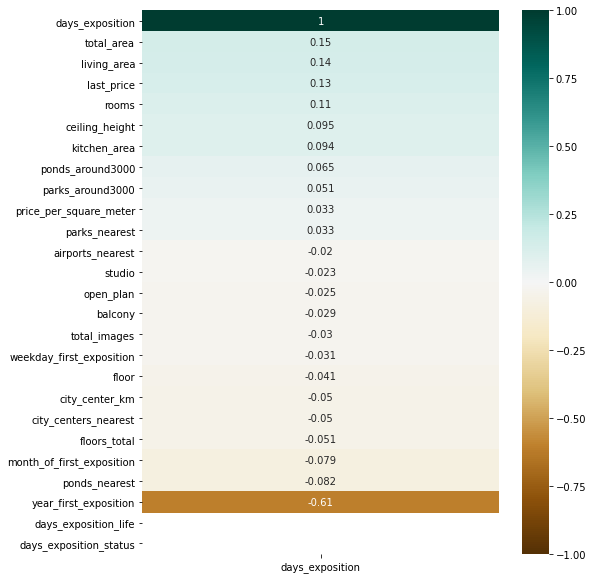

In [95]:
plt.figure(figsize=(8, 10))
heatmap = (
    sns.heatmap(data.query('year_first_exposition != 2019').corr()[['days_exposition']]
                .sort_values(by='days_exposition', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG'))

In [96]:
print(f"Последний день в данных: {data['first_day_exposition'].max()}")

Последний день в данных: 2019-05-03 00:00:00


In [97]:
lst_of_peaks = [45, 60, 30, 90]
data.query('days_exposition in @lst_of_peaks')\
    .pivot_table(index='year_first_exposition', values='days_exposition', aggfunc='count')

,days_exposition
year_first_exposition,
2016,41
2017,277
2018,357
2019,60


Скорость продажи объекта недвижимости слабо скорректирована с различным параметрами недвижимости. Для корректности расчёта корреляции исключили данные за 2019 год, где не продано ещё больше 60% объектов. 
Из представленных данных можно сделать следующий вывод:

Скорость продажи объектов недвижимости растёт. В колонке `days_exposition` хранятся только проданные объекты, поэтому год никак не влияет на количество непроданных объектов. Так, во-первых с 2014 количество пользователей исключительно растёт. Если в 2015 году количество пользователей было - `1158`, то в в 2018 уже `8442`. В 2019 данные полностью есть только за апрель. При этом количество пользователей составило уже `2854`, таким образом, к концу года можно ожидать `9000` объявлений. 
При этом, как было упомянуто в начале, скорость продажи недвижимости также кратно возросло. Если в 2015 году медианное время составляло `580 день`, то в 2018 году объявления снимались уже спустя `63 дня`. Что касается неполного 2019 года, то медианное время продажи составило всего `23 дня`. Таким образом наблюдается явная тенденция к ускорению цикла "выставление-продажа". Но стоит отметить, что статистика за 2019 года за семь месяцев могла измениться, ведь количество не проданных объектов на `03-05-2023` составило `62,26%`. 

При этом на графике наблюдаются пики на круглых цифрах - `30, 45 (наибольшее количество значений), 60, 90`. По правилам сервиса Яндекс.Недвижимость объявления снимаются спустя определенный срок в зависимости от категории объекта недвижимости. Судя по всему, полноценно данный сервис заработал только в 2017 году (`277` снятых объявлений в 2017 году против `41` в 2016). 

Суммируя вышесказанное, можно заключить, что быстрой продажей стоит назвать объекты, которые были проданы за `45 дней`, если же время "жизни" объявления больше `227 дней`, то такую продажу можно назвать долгой.

#### <a id='toc1_1_5_1_'></a>Вывод      [](#toc0_)

1. Пик продаж приходится на первые год продаж, где продаются 75% всей недвижимости. При этом 50% продаются за первые пол года. А на первые полтора месяця приходит 25% продаж. 
2. При этом можно отдельно посмотреть столбец с объектами, которые не были проданы на момент сбора статистических данных. Видно, что таких объектов мало. 75% приходится на 230 дней. Что говорит о том, что объект мог быть продан в ближайшие пол года. При этом наблюдается всего 17 объектов, которые не были проданы с 2014 года (или по крайней мере не сняты с сайта), и по ~ 60 за 2015 и 2016 год. Процент реализованных объектов недвижимости очень большой.

### <a id='toc1_1_6_'></a>Какие факторы влияют на общую (полную) стомость объекта?      [](#toc0_)

Катетеризуем данные. Для этого напишем следующую функцию:

In [99]:
def categorize_price(price):
    price_div = price / 1000000
    try:
        if price_div < 1:
            return '1'
        elif 1 < price_div <= 2:
            return '1 - 2'
        elif 2 < price_div <= 4:
            return '2 - 4'
        elif 4 < price_div <= 6:
            return '4 - 6'
        elif 6 < price_div <= 8:
            return '6 - 8'
        elif 8 < price_div <= 10:
            return '8 - 10'
        elif 10 < price_div <= 100:
            return '>10-100'
        else:
            return '>100'
    except:
        pass

In [100]:
data['total_price_category_mil'] = data['last_price'].apply(categorize_price)

In [101]:
table_price = (
    data
    .pivot_table(values=['total_area','living_area','kitchen_area','rooms', 'last_price'], index='total_price_category_mil')
)
table_price

,kitchen_area,last_price,living_area,rooms,total_area
total_price_category_mil,,,,,
1,7.110,"771,786.330",25.187,1.692,41.697
1 - 2,7.240,"1,607,584.511",25.234,1.671,42.428
2 - 4,8.096,"3,224,058.981",23.406,1.489,41.730
4 - 6,9.415,"4,921,565.705",30.619,2.003,53.013
6 - 8,11.332,"6,936,055.266",38.736,2.417,66.901
8 - 10,13.104,"8,983,841.674",46.617,2.700,80.102
>10-100,17.102,"14,924,327.866",60.253,3.124,105.511
>100,6.386,"1,000,000.000",25.484,1.700,40.360


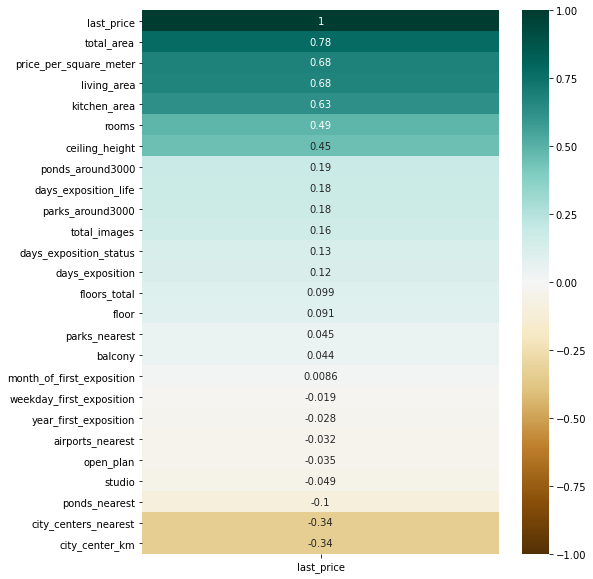

In [102]:
plt.figure(figsize=(8, 10))
heatmap = (
    sns.heatmap(data.corr()[['last_price']]
                .sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG'))

<Figure size 432x288 with 0 Axes>

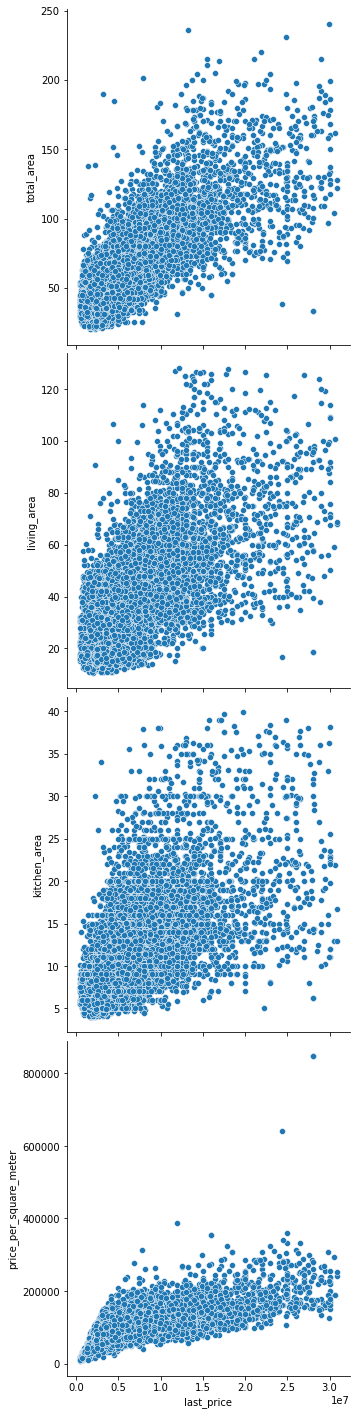

In [103]:
plt.figure()
prplot = (sns.pairplot(data, 
                       x_vars=['last_price'], 
                       y_vars=['total_area','living_area','kitchen_area', 'price_per_square_meter'], 
                       height=5))

Построим сводную таблицу для иллюстрации зависимости стоимости квартиры от этажа:

Text(0.5, 1.0, 'Зависимость средней стоимости \n объекта от этажа')

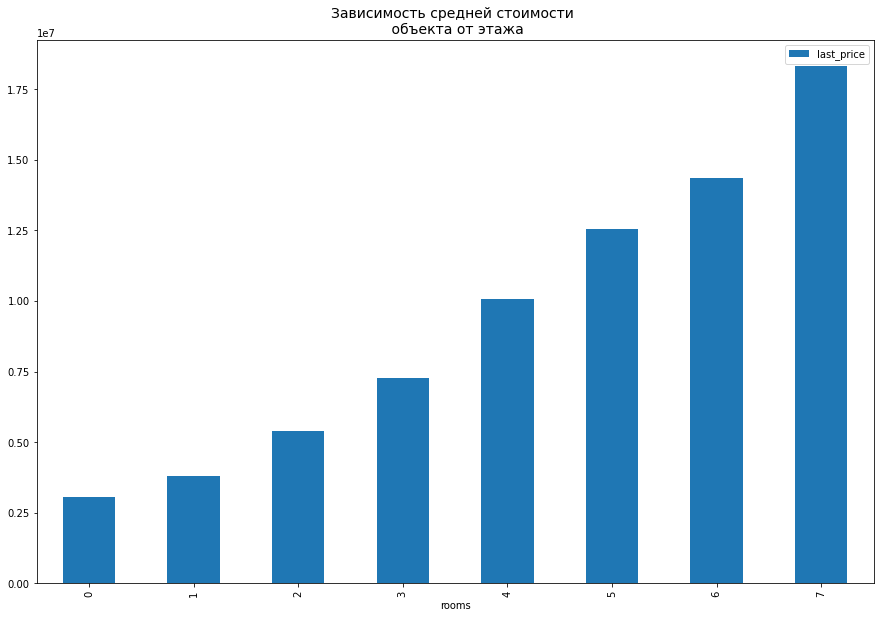

In [104]:
ax = data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar', figsize=(15,10))
ax.set_title('Зависимость средней стоимости \n объекта от этажа', fontsize=14)

Text(0.5, 1.0, 'Зависимость средней стоимости объекта \nот типа этажа')

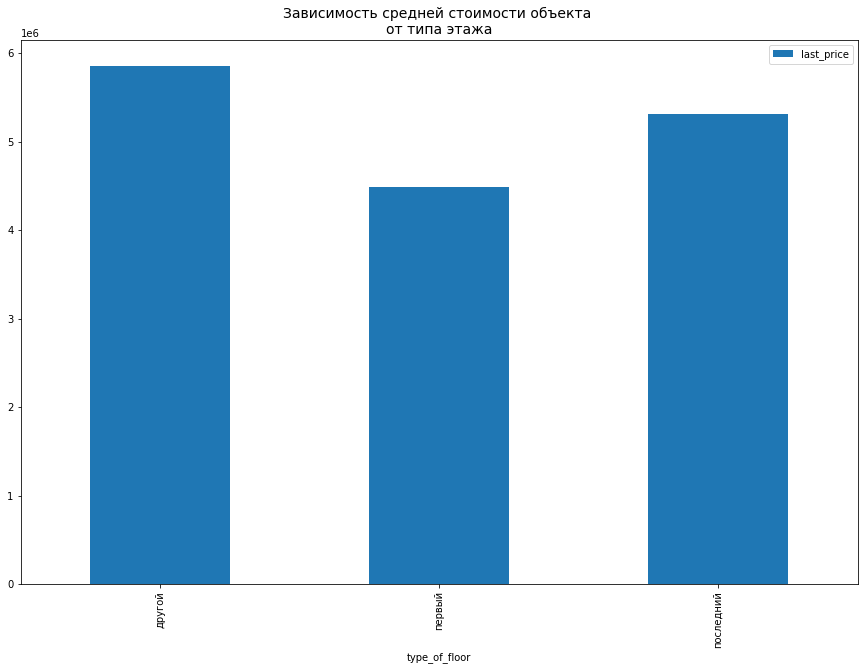

In [105]:
ax = data.pivot_table(index='type_of_floor',values='last_price').plot(y='last_price', kind='bar', figsize=(15,10))
ax.set_title('Зависимость средней стоимости объекта \nот типа этажа', fontsize=14)

<AxesSubplot:title={'center':'Средняя цена в зависимости \n от года размещения объявления'}, xlabel='year_first_exposition'>

<Figure size 1080x720 with 0 Axes>

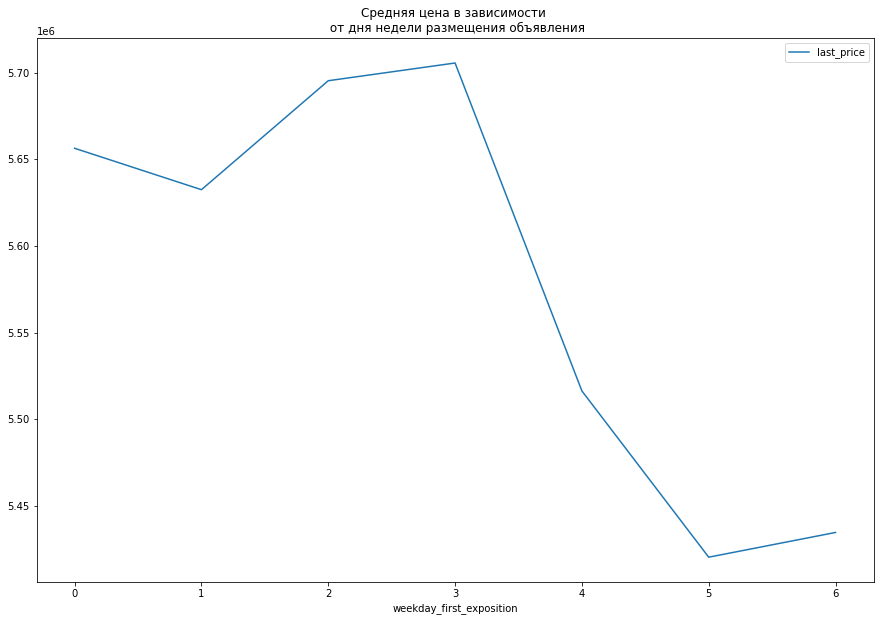

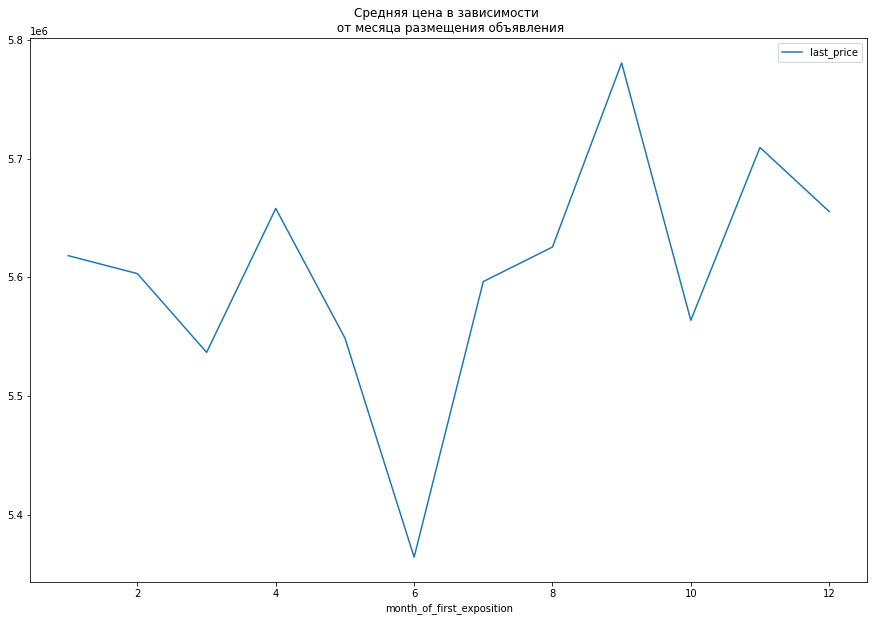

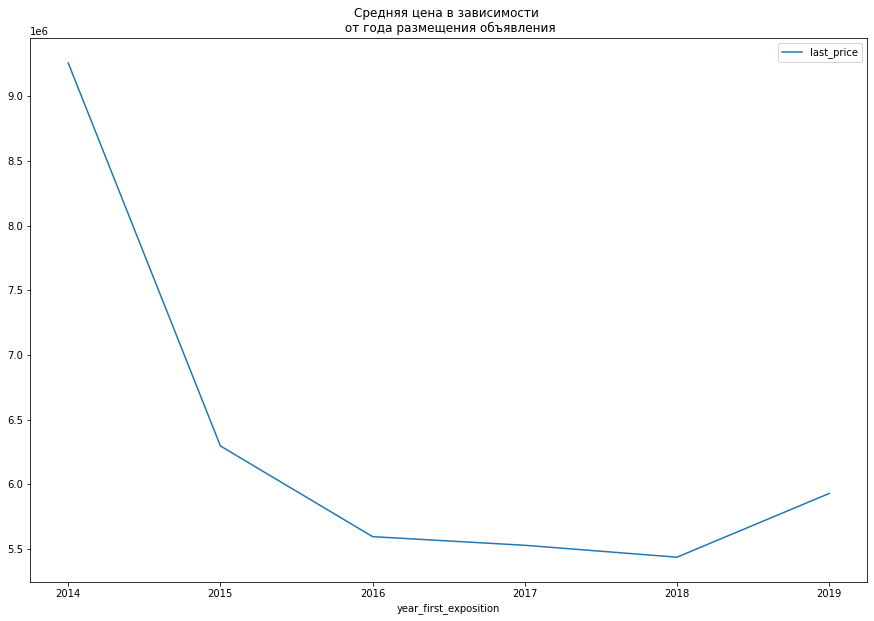

In [106]:
fig = plt.figure(figsize=(15,10))

data.pivot_table(index='weekday_first_exposition',values='last_price')\
    .plot(y='last_price', kind='line', title='Средняя цена в зависимости \n от дня недели размещения объявления', figsize=(15,10))
    

data.pivot_table(index='month_of_first_exposition',values='last_price')\
    .plot(y='last_price', kind='line', title='Средняя цена в зависимости \n от месяца размещения объявления', figsize=(15,10))

data.pivot_table(index='year_first_exposition',values='last_price')\
    .plot(y='last_price', kind='line', title='Средняя цена в зависимости \n от года размещения объявления', figsize=(15,10))

In [107]:
change_by_years= (
    data.pivot_table(values=['last_price','total_area','city_center_km', 'days_exposition_status'], index='year_first_exposition', 
                                                                                aggfunc= {'last_price' : 'mean',
                                                                                          'total_area' : 'mean',
                                                                                          'city_center_km' : 'mean',
                                                                                          'days_exposition_status' : ['mean','count']}
)
)
change_by_years.columns = ['city_center_km','total_ads','no_sold','last_price_avg','total_area_avg']
(
    change_by_years
    .style
    .format({'no_sold': '{:,.2%}'.format, 'last_price_avg' : '{:,.2f}', 'total_area_avg' : '{:,.2f}'})
)

,city_center_km,total_ads,no_sold,last_price_avg,total_area_avg
year_first_exposition,,,,,
2014,13.883495,125,12.00%,"9,258,366.56",79.52
2015,13.286857,1082,5.36%,"6,296,463.89",63.96
2016,14.310632,2620,2.29%,"5,594,834.85",58.42
2017,14.520602,7852,3.03%,"5,528,240.28",57.15
2018,14.752245,8224,10.86%,"5,436,161.93",55.70
2019,14.213467,2761,62.19%,"5,928,880.57",56.16


##### <a id='toc1_1_6_1_1_'></a>Вывод   [](#toc0_)

 Таким образом, можно сделать следующие выводы:
- Больше всего цена зависит от общей площади. Процент корреляция составил - `0.78`, что считается сильной корреляцией;
- Далее идёт жилая площадь и размер кухни. При этом первый параметр влияет чуть сильнее, чем второй: `0.68` против `0.63`;
- В меньшей степени влияет количество комнат, здесь корреляция `0.49`;
- При этом расстояние от центра имеет корреляцию всего `-0.34`. Это говорит о том, что чем дальше от центра, тем дешевле недвижимость. Однако другие факторы перевешивают, и большая по площади квартира дальше от центра может стоить дороже, чем ближе к центру но "маленькая;
- Слабая зависимость стоимости квартиры от этажа. При этом дорогих квартир на первом и последнем этаже меньше, чем в категории "другой".

Помимо прочего, средняя цена зависит от года выставления объекта. Средняя цена упала с 2014 года и находится на уровне 5.5 - 6 миллиона. Для "справедливой" оценки объекта стоит смотреть на его площадь (которая также уменьшилась с 2014 года), расстояние до центра, необходимо учитывать и индекс недвижимости. 

Другие параметры квартиры слабо скорректированы со стоимостью квартиры. Однако это не значит, что они совсем не влияют на стоимость квартиры, ведь каждый случай стоит рассматривать индивидуально. 

### <a id='toc1_1_7_'></a>Средняя цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений:      [](#toc0_)

In [108]:
lst_top_ten = data['locality_name'].value_counts().head(10).index
table_top_ten = data.query('locality_name in @lst_top_ten').pivot_table(values='price_per_square_meter', index='locality_name')
table_top_ten.sort_values(by='price_per_square_meter', inplace=True)

In [109]:
table_top_ten

,price_per_square_meter
locality_name,
Выборг,"58,341.391"
Всеволожск,"68,631.559"
Гатчина,"68,770.986"
Колпино,"75,392.529"
посёлок Шушары,"78,475.275"
посёлок Мурино,"85,441.688"
посёлок Парголово,"90,175.214"
посёлок Кудрово,"92,729.867"
Пушкин,"102,512.170"


<AxesSubplot:title={'center':'График сравнения ср. цены топ 10 населённых пунктов'}, ylabel='locality_name'>

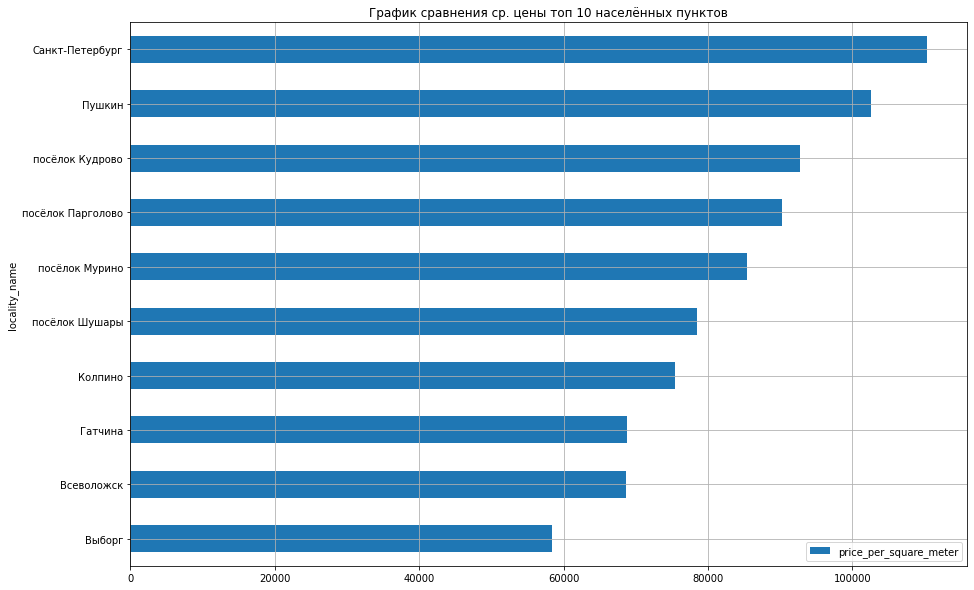

In [110]:
table_top_ten.plot(kind='barh', grid=True, figsize=(15,10), 
                   title='График сравнения ср. цены топ 10 населённых пунктов')

#### <a id='toc1_1_7_1_'></a>Вывод   [](#toc0_)

Самая большая цена квадратного метра в городе `Санкт-Петербург` : `110,349.424 ₽`. Далее идёт ближайший пригород: `Пушкин, Кудрово, Мурино` и `посёлок Парлогово`. Стоит отметить, что средняя цена квадратного метра от населенного пункта к пункту падает плавно. На последнем месте: `Выборг` со средней стоимостью `58,341.391 ₽`. 

### <a id='toc1_1_8_'></a>Средняя цена километра от центра в городе "Санкт-Петербруг"      [](#toc0_)

средняя цена километра: -305442.0062695924


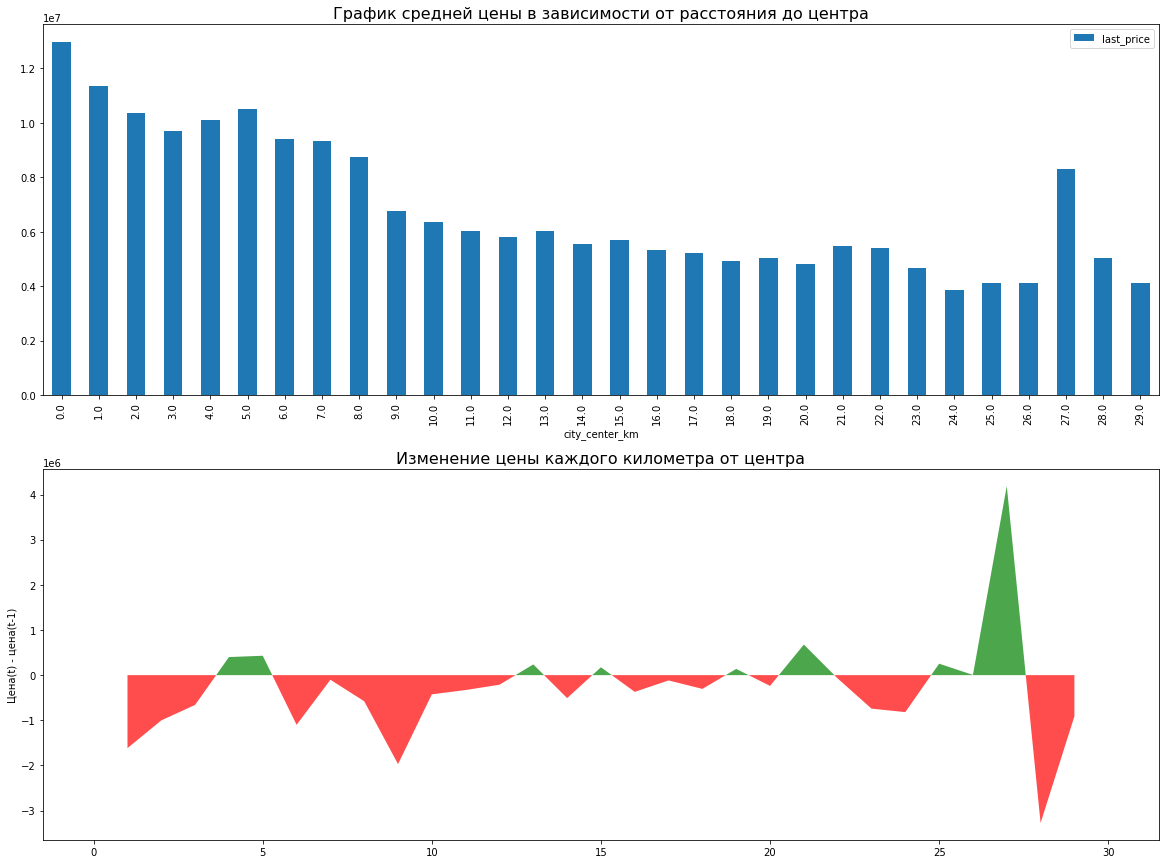

In [111]:
table_spb = data.query('locality_name == "Санкт-Петербург"').pivot_table(values='last_price', index='city_center_km')

x = np.arange(table_spb.shape[0])
y_returns = (table_spb["last_price"] - table_spb["last_price"].shift(1))

fig = plt.figure()
fig.set_figwidth(20) 
fig.set_figheight(15) 
ax_1 = fig.add_subplot(2, 1, 1)
ax_2 = fig.add_subplot(2, 1, 2)

table_spb.plot(ax=ax_1, kind='bar')
ax_1.set_title('График средней цены в зависимости от расстояния до центра', fontsize=16)
ax_2.hist(x = data.days_exposition,range=(0,30))
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)
plt.title("Изменение цены каждого километра от центра", fontsize=16)
plt.ylabel('Цена(t) - цена(t-1)')

print(f'средняя цена километра: {(table_spb["last_price"] - table_spb["last_price"].shift(1)).mean()}')

In [112]:
data.query('city_center_km == 27 & last_price>10000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_first_exposition,month_of_first_exposition,year_first_exposition,days_exposition_life,days_exposition_status,price_per_square_meter,type_of_floor,city_center_km,total_price_category_mil
140,8,"16,912,000.000",105.700,2016-12-09,2,2.700,3,48.400,1,False,False,15.400,0,Пушкин,"14,352.000","26,506.000",3.000,366.000,3.000,179.000,390.000,4,12,2016,NaN,False,"160,000.000",первый,27.000,>10-100
748,13,"14,350,000.000",74.000,2017-11-28,2,3.130,5,30.000,3,False,False,25.000,0,Санкт-Петербург,"23,888.000","27,313.000",1.000,"1,496.000",0.000,NaN,128.000,1,11,2017,NaN,False,"193,918.919",другой,27.000,>10-100
2414,20,"29,500,000.000",115.000,2017-07-21,3,3.000,2,69.750,2,False,False,19.200,4,Пушкин,"14,456.000","26,609.000",3.000,229.000,3.000,172.000,328.000,4,7,2017,NaN,False,"256,521.739",последний,27.000,>10-100
2776,8,"10,500,000.000",105.000,2017-12-06,4,3.120,3,76.300,1,False,False,6.300,0,Пушкин,"14,880.000","27,034.000",1.000,169.000,0.000,NaN,NaN,2,12,2017,513.000,True,"100,000.000",первый,27.000,>10-100
2948,23,"11,350,000.000",75.000,2017-08-15,3,3.500,2,52.700,2,False,False,8.700,4,Пушкин,"15,337.000","27,490.000",3.000,216.000,3.000,153.000,207.000,1,8,2017,NaN,False,"151,333.333",последний,27.000,>10-100
4400,4,"12,300,000.000",78.650,2017-09-09,3,2.600,5,48.000,1,False,False,11.000,0,Пушкин,"14,567.000","26,720.000",2.000,403.000,0.000,NaN,4.000,5,9,2017,NaN,False,"156,389.065",первый,27.000,>10-100
7996,17,"16,600,000.000",106.000,2017-12-02,4,3.200,3,50.000,3,False,False,30.000,0,Пушкин,"14,822.000","26,976.000",1.000,254.000,0.000,NaN,NaN,5,12,2017,517.000,True,"156,603.774",последний,27.000,>10-100
12466,11,"15,000,000.000",89.600,2017-01-31,3,2.600,3,57.000,3,False,False,13.500,0,Пушкин,"15,065.000","27,218.000",3.000,317.000,3.000,509.000,357.000,1,1,2017,NaN,False,"167,410.714",последний,27.000,>10-100
15578,20,"16,000,000.000",101.900,2018-01-08,2,2.870,4,48.100,1,False,False,26.900,0,Пушкин,"15,201.000","27,355.000",2.000,273.000,3.000,368.000,NaN,0,1,2018,480.000,True,"157,016.683",первый,27.000,>10-100
18386,15,"24,800,000.000",190.000,2014-12-10,4,2.620,4,104.100,3,False,False,30.000,0,Пушкин,"15,072.000","27,226.000",1.000,114.000,0.000,NaN,NaN,2,12,2014,"1,605.000",True,"130,526.316",другой,27.000,>10-100


In [113]:
data.query('city_center_km == 27').locality_name.value_counts()

Пушкин                     65
посёлок Металлострой       30
Санкт-Петербург             2
посёлок Александровская     1
Красное Село                1
посёлок Петро-Славянка      1
Name: locality_name, dtype: int64

На 27 км. от центра находится город Пушкин. В предыдущем исследовании мы выяснили, что это второй по цене квадратного метра город, после Санкт-Петербурга. В связи со скоплением в нём дорогих квартир, происходит выброс в средней цене километра от центра. 

In [114]:
data.query('city_center_km == 3').pivot_table(index='type_of_floor', values='last_price', aggfunc=['mean','count']).droplevel(1,axis=1)

,mean,count
type_of_floor,,
другой,"10,238,962.772",180
первый,"7,389,446.939",49
последний,"9,903,668.778",72


In [115]:
data.query('city_center_km == 4').pivot_table(index='type_of_floor', values='last_price', aggfunc=['mean','count']).droplevel(1,axis=1)

,mean,count
type_of_floor,,
другой,"10,437,608.332",431
первый,"7,751,095.890",73
последний,"10,343,692.053",94


In [116]:
data.query('city_center_km == 5').pivot_table(index='type_of_floor', values='last_price', aggfunc=['mean','count']).droplevel(1,axis=1)

,mean,count
type_of_floor,,
другой,"10,678,599.649",593
первый,"7,586,485.797",74
последний,"11,562,669.851",121


#### <a id='toc1_1_8_1_'></a>Вывод   [](#toc0_)

Средняя цена каждого километра в Санкт-Петербурге составляет `-305,442 ₽`. При этом с 0 километра наблюдается плавное (с редкими небольшими выбросами) падение цены в зависимости от расстояния от центра. Наблюдается лишь две особенности - на `5 км` цена растёт, относительно предыдущих двух значений. Это вероятно связано с обилием в этом радиусе дорогой недвижимости на последнем этаже. Вторая особенность - выброс на 27 км. Он связан с тем, что на этом удалении от центра находится город Пушкин. Как было исследовано в предыдущей главе, это второй по цене за кв.м. город, после Санкт-Петербурга. 

In [117]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_first_exposition,month_of_first_exposition,year_first_exposition,days_exposition_life,price_per_square_meter,city_center_km
count,"22,664.000","22,664.000","22,664.000","22,664.000","22,567.000","22,664.000","22,664.000","22,664.000","22,664.000","22,664.000","17,223.000","17,243.000","17,244.000","7,487.000","17,244.000","8,449.000","19,683.000","22,664.000","22,664.000","22,664.000","2,981.000","22,664.000","17,243.000"
mean,9.835,"5,608,582.542",57.099,2.017,2.685,10.768,32.769,5.909,10.051,0.599,"28,904.429","14,478.556",0.585,495.119,0.739,525.827,178.312,2.568,6.403,"2,017.379",207.685,"96,037.271",14.473
std,5.639,"3,807,732.617",24.730,0.975,0.174,6.558,16.160,4.879,4.403,0.961,"12,779.086","8,537.813",0.779,343.597,0.916,276.713,216.889,1.789,3.492,1.031,293.320,"35,651.678",8.547
min,0.000,"430,000.000",20.066,0.000,2.500,1.000,10.500,1.000,4.010,0.000,"6,450.000",287.000,0.000,1.000,0.000,13.000,1.000,0.000,1.000,"2,014.000",0.000,"7,962.963",0.000
25%,6.000,"3,400,000.000",40.000,1.000,2.550,5.000,19.000,2.000,7.000,0.000,"18,398.000","9,801.500",0.000,292.000,0.000,304.000,45.000,1.000,3.000,"2,017.000",30.000,"76,040.945",10.000
50%,9.000,"4,589,500.000",51.000,2.000,2.700,9.000,30.000,4.000,9.000,0.000,"27,038.000","13,256.000",0.000,456.000,0.000,510.000,94.000,3.000,6.000,"2,017.000",80.000,"94,332.692",13.000
75%,14.000,"6,500,000.000",67.600,3.000,2.700,16.000,41.300,8.000,11.600,1.000,"37,434.000","16,419.000",1.000,616.000,1.000,736.000,227.000,4.000,10.000,"2,018.000",261.000,"112,857.143",16.000
max,50.000,"30,891,300.000",240.000,7.000,3.500,34.000,128.000,32.000,39.900,5.000,"84,869.000","65,968.000",3.000,"3,190.000",3.000,"1,344.000","1,580.000",6.000,12.000,"2,019.000","1,618.000","848,484.848",66.000


### <a id='toc1_1_9_'></a>Итоги исследования   [](#toc0_)

В исследовании был проведен анализ архива Яндекс.Недвижимости за период с 2014 г. - по 2015 г. 

a. Исходные данные: 

Исход данные представляли собой датасет с размером: 23699 строки и 22 колонки. Данные разделены на две категории: заполненные людьми и заполненные автоматически. При этом в них содержалось множество пропусков и аномальных значений. Их можно объяснить следующими факторами:
- Человеческие ошибки при заполнении данных. Результат: возникающие аномалии. Пример: несуществующая высота потолков;
- Необязательность заполнения данных. Результат: пропуски в данных. Пример: колонка с апартаментами, где отсутствовало `90%` данных;
- Технические ошибки при заполнении данных. Результат: Пропуски в данных. Пример: колонки с парками, прудами и аэропортами.  

 Вывод: Необходима переработка данных, с учетом всей известной информации о датасете.

b. Переработка данных:

Каждый параметр была проанализировано как изолированно друг от друга, так и в совокупности с другими параметрами, которые могут влияет на анализируемый параметр. Была проделана следующая работа:

- Отформатировали колонку с датой, поменяли формат на `datetime`;
- Добавили отдельно колонки с днем недели публикации объявления, месяцем и годом;
- Оценили пропуски в столбце `is_apartment`. Выдвинули гипотезу, о том, что заполнены в основном `True` - значения. Это позволило бы заполнить все пропуски значением `False`. Однако гипотеза была отвергнута. В связи с этим было принято решение удалить данную колонку;
- Цена объекта также была обработана. Были отброшены экстремальные значения. Первое - минимальное, было вызвано человеческой ошибкой в заполнении стоимости объекта. Второе - максимальное, выбивающая из общей выборки недвижимость. При этом, стоит отметить, что для более глубокого анализа имеющуюся выборку стоит поделить по категориям исходя из конъюнктуры рынка недвижимости. В таком случае анализ получится более детальным и результаты из разных категорий не будут влиять на результаты друг друга;
- Высота потолков во всех объектах, где это возможно, была приведена в соответствии с нормами. Аномальные значения были отброшены ;
- Были проанализированы названия населенных пунктов. Найдены и заменены неявные дубликаты. Результат можно улучшить, если провести дополнительный анализ населенных пунктов с использованием гео-данных. 
- Все пропуски в балконах были заменены на 0;
- Была проанализирована общая, жилая и кухонная площадь. Найдены и отброшены результаты, которые не соответствуют нормам. Найдены аномальные значения общей площади, когда она была меньше, чем указанная совокупная жилая и кухонная площадь. Заменены вероятны ошибки в данных, где жилая площадь меньше, чем кухонная;
- Оставлены пропуски в `days_exposition`, которые означают, что недвижимость не была продана (или как минимум, объявление не было снято). Также были сохранены пропуски в автоматически составленных колонках. Часть пропусков имеют естественную природу: например, если нет парков в радиусе 3 км, то ближайший парк будет с пропуском. Вторая часть пропусков имеет техническую природу, однако ни заполнить, ни избавиться от них без ущерба общей информации не представляется возможным. В связи с чем также было принято решение их оставить.

Результат: Данные были обработаны от пропусков и аномальных значений. Сохранность выборки составила - `95,63%`

c. Была добавлена следующая информация:

- День недели, когда объявление было выставлено (0 - понедельник, 1 - вторник);
- Месяц, когда объявление было выставлено;
- Год, когда объявление было выставлено;
- Расстояние до центра в километрах
- Категоризация этажей: `первый`, `последний`, `другой` или `цокальный`.

d. Был проведен анализ общих показателей объекта недвижимости. Он показал, что:

- `total_images` в среднем объявление имеет $9$ фотографий. $75$% объявлений имеют $14$ фотографий. Максимальное количество фотографий - $50$ (вероятно, максимально доступное для загрузки на сайт), однако объявлений с фотографий от $15$ до $50$ штук всего $25%$;
- `last_price` - как можно заметить из гистограммы, основное количество объявлений находится в зоне до $10,000,000$₽, если говорить точнее, то $50$% всех объявлений приходится на цену $5,000,000$₽ и ниже. График имеет достаточно большой хвост, не смотря на то, что он был обрезан. Это свидетельствует о том, что в данных имеется "элитная" недвижимость. Вероятно, для более глубокого анализа стоило разделить данные на две категории: обычную недвижимость и элитную недвижимость. Однако для целей данного исследования это не требуется;
- `total_area` - общая площадь в среднем составляет `50-60` кв.метров. Данные имеют также больше хвост, однако распределение отличается от распределения `last_price`. Здесь мы наблюдаем более плавный уменьшение количества объявления с ростом площади;
- `living_area` - данные, которые непрерывно связаны с `total_area`. Распределение почти похожи, кроме одного фактора: большего количества маленьких площадей для жизни. Из этого можно сделать промежуточный вывод, что рост жилой площади сначала не так сильно скорректирован с ростом общей площади. 
- `kitchen_area` - ещё один показатель, связанный с общей площадью. Здесь наблюдается такая же история, однако количество малых кухонь все-таки несколько ниже, чем малых жилых помещений. Вывод можно сделать такой же, как и с `living_area`, однако "начальная" корреляция тут явно выше;
- `rooms` - минимальное количество комнат - 0. Это означает, что квартира - студия. `25%` - это недвижимость с одной комнатой или студии, еще `25%` - двух комнатные квартиры. И в конечном счете, 75% квартир - это трех комнатные. Оставшиеся 25% это хвост, который содержит в себе количество комнат от четырех до одиннадцати;
- `ceiling_height` - высота потолков распределена равномерно, после отчистки данных `75%` лежит в диапазоне от 2.5 м до 2.7 м. Еще 25% составляет недвижимость с высотой потолков до 3.7 метров;
- `total_floors` - 75% данных - это дома до 20 этажей. Объявления выше 16 этажей можно назвать редкостью;
- `floor` - в основном недвижимость (75% объявлений) продается до 8 этажа. При этом видно небольшую диспропорцию, количество объявлений на нижних этаж больше и падает достаточно резко. Таким образом, можно сделать вывод, что люди охотнее продают недвижимость на нижних этажах.
- `type_of_floor` - в основном продают не первый и не последний этаж. Таких объявлений (первый или второй этаж)  около 6000 в общей сложности;
- `cityCenters_nearest` - большая часть объявлений это недвижимость, которая находится не дальше 20км от центра. Количество таких объявлений больше 75%. При этом на графике распределения видно, что имеется второе скопление объявлений в районе от 20 до 40км, однако оно несравнимо меньше. Чем дальше от центра города, тем меньше объявлений. 
- `airports_nearest` - Пик - недвижимость в отдалении от аэропорта на 23-24км. При этом 75% принадлежит недвижимости, которая удалена от аэропорта не больше, чем на 26 км. Остальные 25% распределены с плавным убыванием, чем дальше от аэропорта, тем меньше объявлений. 
- `parks_nearest` - в основном парки находится на расстоянии в один километр от объекта недвижимости
- `месяц публикации` - здесь можно наблюдать ярко выраженную сезонность. Наибольшее количество объявлений - в феврале и марте. Затем происходит затухание рынка. Минимум наблюдается в мае, затем количество объявлений начинает расти вплоть до ноября. Декабрь и январь традиционно в связи с закрытием года и праздничными днями имеют в среднем  малое количество объявлений. 
- `день публикации` - объявления практически равномерно распределены по дням. Исключения - суббота и воскресенье. 


e. Проанализирована информация о скорости продажи недвижимости. 


Вывод: Скорость продажи объекта недвижимости слабо скорректирована с различным параметрами недвижимости. Для корректности расчёта корреляции исключили данные за 2019 год, где не продано ещё больше 60% объектов. 

Скорость продажи объектов недвижимости растёт. В колонке `days_exposition` хранятся только проданные объекты, поэтому год никак не влияет на количество непроданных объектов. Так, во-первых с 2014 количество пользователей исключительно растёт. Если в 2015 году количество пользователей было - `1158`, то в в 2018 уже `8442`. В 2019 данные полностью есть только за апрель. При этом количество пользователей составило уже `2854`, таким образом, к концу года можно ожидать `9000` объявлений. 
При этом, как было упомянуто в начале, скорость продажи недвижимости также кратно возросло. Если в 2015 году медианное время составляло `580 день`, то в 2018 году объявления снимались уже спустя `63 дня`. Что касается неполного 2019 года, то медианное время продажи составило всего `23 дня`. Таким образом наблюдается явная тенденция к ускорению цикла "выставление-продажа". Но стоит отметить, что статистика за 2019 года за семь месяцев могла измениться, ведь количество не проданных объектов на `03-05-2023` составило `62,26%`. 

При этом на графике наблюдаются пики на круглых цифрах - `30, 45 (наибольшее количество значений), 60, 90`. По правилам сервиса Яндекс.Недвижимость объявления снимаются спустя определенный срок в зависимости от категории объекта недвижимости. Судя по всему, полноценно данный сервис заработал только в 2017 году (`277` снятых объявлений в 2017 году против `41` в 2016). 

Суммируя вышесказанное, можно заключить, что быстрой продажей стоит назвать объекты, которые были проданы за `45 дней`, если же время "жизни" объявления больше `227 дней`, то такую продажу можно назвать долгой.


f. Произведена оценка влияния факторов на стоимость объекта. С помощью таблицы корреляции и графиков разброса были выявлены следующие закономерности: 


- Больше всего цена зависит от общей площади. Процент корреляция составил - `0.78`, что считается сильной корреляцией;
- Далее идёт жилая площадь и размер кухни. При этом первый параметр влияет чуть сильнее, чем второй: `0.68` против `0.63`;
- В меньшей степени влияет количество комнат, здесь корреляция `0.49`;
- При этом расстояние от центра имеет корреляцию всего `-0.34`. Это говорит о том, что чем дальше от центра, тем дешевле недвижимость. Однако другие факторы перевешивают, и большая по площади квартира дальше от центра может стоить дороже, чем ближе к центру но "маленькая;
- Слабая зависимость стоимости квартиры от этажа. При этом дорогих квартир на первом и последнем этаже меньше, чем в категории "другой".

Помимо прочего, средняя цена зависит от года выставления объекта. Средняя цена упала с 2014 года и находится на уровне 5.5 - 6 миллиона. Для "справедливой" оценки объекта стоит смотреть на его площадь (которая также уменьшилась с 2014 года), расстояние до центра, необходимо учитывать и индекс недвижимости. 

Другие параметры квартиры слабо скорректированы со стоимостью квартиры. Однако это не значит, что они совсем не влияют на стоимость квартиры, ведь каждый случай стоит рассматривать индивидуально. 


g. Найдены десять самых частых населенных пункта, где продают и покупают недвижимость. В этом разрезе был проведен анализ стоимости квадратного метра.

Самая большая цена квадратного метра в городе `Санкт-Петербург` : `110,349.424 ₽`. Далее идёт ближайший пригород: `Пушкин, Кудрово, Мурино` и `посёлок Парлогово`. Стоит отметить, что средняя цена квадратного метра от населенного пункта к пункту падает плавно. На последнем месте: `Выборг` со средней стоимостью `58,341.391 ₽`. 

h. Рассчитана цена каждого километра от центра в городе "Санкт-Петербург"

Средняя цена каждого километра в Санкт-Петербурге составляет `-305,442 ₽`. При этом с 1 километра наблюдается плавное (с редкими небольшими выбросами) падение цены в зависимости от расстояния от центра. Наблюдается лишь две особенности - на `5 км` цена растёт, относительно предыдущих двух значений. Это, вероятно, связано с обилием в этом радиусе дорогой недвижимости на последнем этаже. Вторая особенность - выброс на 27 км. Он связан с тем, что на этом удалении от центра находится город Пушкин. Как было исследовано в предыдущей главе, это второй по цене за кв.м. город, после Санкт-Петербурга. 

Правильнее всего разделять недвижимость по категориям (в зависимости от стоимости, местоположения, площади) и анализировать каждую выборку изолировано. 

Краткое резюме: 

Для того, чтобы выявлять мошеннические объявления, нужно:

a) Разделить выборку по ценовым категориям. Для каждой категории будут свои типичные параметры, выход за которые может свидетельствовать о возможных проблемах или мошеннических действиях;

б) Отслеживать общую экономическую ситуацию и рыночную конъектуру. Это касается, например, скорости продаж объектов недвижимости. В ходе исследования, был сделан вывод, что скорость продаж от года к году неизменно растет. Стоит учитывать этот фактор, при анализе объявлений. Но стоит понимать, что возможна и стагнация, в таком случае скорость продаж замедлится;

в) Необходимо отслеживать аномальные значения или их совокупность. Если появляется объявлений с низкой стоимостью, при этом с большой площадью и близко к центру - данная совокупность может стать триггером для проверки. Стоит также оценивать объекты, которые были проданы слишком быстро. Это также могут быть мошеннические объявления в с целью искажения статистики. 
